# GEOCLIM Calibration

This notebook makes analyses that are related to calibrating GEOCLIM.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## Google Drive Root

Set the root to the Google Drive folder in which large files are stored here:

In [2]:
yp_root = '/Users/yuempark/Documents/Berkeley/Research_GEOCLIM/Paleogeo_GEOCLIM/'

root = yp_root

## Functions

In [3]:
def plot_atmosphere(path):
    """
    Plot atmospheric CO2 and O2 evolution.
    
    Parameters
    ----------
    path : string
        Path to directory where GEOCLIM output is stored.
        
    Returns
    -------
    None.
    """
    # set up figure
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), sharex=True)

    # read in the correct file
    geoclim = Dataset(path+'geoclim_output.test.nc')

    # CO2
    ax[0].plot(geoclim.variables['time'][:]/1e6, geoclim.variables['CO2_atm_conc'][:])
    ax[0].set_ylabel('atmospheric CO$_{2}$\n(ppm)')
    ax[0].yaxis.grid(ls='--')

    # O2
    ax[1].plot(geoclim.variables['time'][:]/1e6, geoclim.variables['O2_atm_conc'][:])
    ax[1].set_ylabel('atmospheric O$_{2}$\n(ppm)')
    ax[1].yaxis.grid(ls='--')
    ax[1].set_xlabel('time (Myr)')
    
    # get final CO2
    final_CO2 = geoclim.variables['CO2_atm_conc'][-1]
    print('final CO2 = {:.3f} ppm'.format(final_CO2))
    return final_CO2

    plt.show(fig)

In [4]:
def plot_slope(Dataset, colormap='viridis', coastlines=False, output=False):
    """
    Plot slope.

    Parameters
    ----------
    Dataset : netCDF dataset
        in this case, dynsoil_output.nc
        
    colormap : string
        desired colormap (default viridis)
        
    coastlines : boolean
        set whether coastlines will be drawn (default False)
        
    output : boolean
        if true, return the figure and axis handles (default False)
    """
    # pull out necessary variables
    lat = Dataset.variables['lat'][:].data
    lon = Dataset.variables['lon'][:].data
    z = Dataset.variables['slope'][:,:].data
    
    # get rid of fill values
    z[z > 1e10] = 0
    
    # fix longitude offset
    lon = lon + 180
    lon = lon[lon > 180] - 360
    
    # wrap the longitude vector around an arbitary point in order to fix non-plotting issue on date line
    wrapped_lon = np.concatenate([lon[5:],lon[:5]])
    wrapped_z = np.concatenate([z[:,5:],z[:,:5]],1)

    # set up the figure
    fig = plt.figure(figsize=(15,6))
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
    if coastlines:
        ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 color='gray', alpha=0.5, linestyle='--')

    # plot the data
    im = ax.pcolormesh(wrapped_lon, lat, wrapped_z, transform=ccrs.PlateCarree())
    im = ax.pcolormesh(lon, lat, z, transform=ccrs.PlateCarree())
    
    # add the colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('slope [m/m]', rotation=270, labelpad=20)

    if output!=False:
        return fig, ax

In [5]:
def plot_temperature(Dataset, colormap='viridis', coastlines=False, output=False):
    """
    Plot temperature.

    Parameters
    ----------
    Dataset : netCDF dataset
        in this case, dynsoil_output.nc
        
    colormap : string
        desired colormap (default viridis)
        
    coastlines : boolean
        set whether coastlines will be drawn (default False)
        
    output : boolean
        if true, return the figure and axis handles (default False)
    """
    # pull out necessary variables
    lat = Dataset.variables['lat'][:].data
    lon = Dataset.variables['lon'][:].data
    z = Dataset.variables['temperature'][-1,:,:].data
    
    # get rid of fill values
    z[z > 1e10] = 0
    
    # fix longitude offset
    lon = lon + 180
    lon = lon[lon > 180] - 360
    
    # wrap the longitude vector around an arbitary point in order to fix non-plotting issue on date line
    wrapped_lon = np.concatenate([lon[5:],lon[:5]])
    wrapped_z = np.concatenate([z[:,5:],z[:,:5]],1)

    # set up the figure
    fig = plt.figure(figsize=(15,6))
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
    if coastlines:
        ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 color='gray', alpha=0.5, linestyle='--')

    # plot the data
    im = ax.pcolormesh(wrapped_lon, lat, wrapped_z, transform=ccrs.PlateCarree())
    im = ax.pcolormesh(lon, lat, z, transform=ccrs.PlateCarree())
    
    # add the colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('temperature [C]', rotation=270, labelpad=20)

    if output!=False:
        return fig, ax

In [6]:
def plot_runoff(Dataset, colormap='viridis', coastlines=False, output=False):
    """
    Plot runoff.

    Parameters
    ----------
    Dataset : netCDF dataset
        in this case, dynsoil_output.nc
        
    colormap : string
        desired colormap (default viridis)
        
    coastlines : boolean
        set whether coastlines will be drawn (default False)
        
    output : boolean
        if true, return the figure and axis handles (default False)
    """
    # pull out necessary variables
    lat = Dataset.variables['lat'][:].data
    lon = Dataset.variables['lon'][:].data
    z = Dataset.variables['runoff'][-1,:,:].data
    
    # get rid of fill values
    z[z > 1e10] = 0
    
    # fix longitude offset
    lon = lon + 180
    lon = lon[lon > 180] - 360
    
    # wrap the longitude vector around an arbitary point in order to fix non-plotting issue on date line
    wrapped_lon = np.concatenate([lon[5:],lon[:5]])
    wrapped_z = np.concatenate([z[:,5:],z[:,:5]],1)

    # set up the figure
    fig = plt.figure(figsize=(15,6))
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
    if coastlines:
        ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 color='gray', alpha=0.5, linestyle='--')

    # plot the data
    im = ax.pcolormesh(wrapped_lon, lat, wrapped_z, transform=ccrs.PlateCarree())
    im = ax.pcolormesh(lon, lat, z, transform=ccrs.PlateCarree())
    
    # add the colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('runoff [cm/yr]', rotation=270, labelpad=20)

    if output!=False:
        return fig, ax

In [7]:
def plot_reg_thickness(Dataset, colormap='viridis', coastlines=False, output=False):
    """
    Plot regolith thickness.

    Parameters
    ----------
    Dataset : netCDF dataset
        in this case, dynsoil_output.nc
        
    colormap : string
        desired colormap (default viridis)
        
    coastlines : boolean
        set whether coastlines will be drawn (default False)
        
    output : boolean
        if true, return the figure and axis handles (default False)
    """
    # pull out necessary variables
    lat = Dataset.variables['lat'][:].data
    lon = Dataset.variables['lon'][:].data
    z = Dataset.variables['reg_thickness'][-1,:,:].data
    
    # get rid of fill values
    z[z > 1e10] = 0
    
    # convert to mm
    z = z*1000
    
    # fix longitude offset
    lon = lon + 180
    lon = lon[lon > 180] - 360
    
    # wrap the longitude vector around an arbitary point in order to fix non-plotting issue on date line
    wrapped_lon = np.concatenate([lon[5:],lon[:5]])
    wrapped_z = np.concatenate([z[:,5:],z[:,:5]],1)

    # set up the figure
    fig = plt.figure(figsize=(15,6))
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
    if coastlines:
        ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 color='gray', alpha=0.5, linestyle='--')

    # plot the data
    im = ax.pcolormesh(wrapped_lon, lat, wrapped_z, transform=ccrs.PlateCarree())
    im = ax.pcolormesh(lon, lat, z, transform=ccrs.PlateCarree())
    
    # add the colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('regolith thickness [mm]', rotation=270, labelpad=20)

    if output!=False:
        return fig, ax

In [8]:
def plot_CO2_consumption(Dataset, colormap='viridis', coastlines=False, output=False):
    """
    Plot regolith thickness.

    Parameters
    ----------
    Dataset : netCDF dataset
        in this case, geographic_output.nc
        
    colormap : string
        desired colormap (default viridis)
        
    coastlines : boolean
        set whether coastlines will be drawn (default False)
        
    output : boolean
        if true, return the figure and axis handles (default False)
    """
    # pull out necessary variables
    lat = Dataset.variables['lat'][:].data
    lon = Dataset.variables['lon'][:].data
    z = Dataset.variables['gra_wth'][-1,:,:].data
    
    # convert NaNs to zeros
    z[np.isnan(z)] = 0
    
    # get rid of fill values
    z[z > 1e10] = 0
    
    # fix longitude offset
    lon = lon + 180
    lon = lon[lon > 180] - 360
    
    # wrap the longitude vector around an arbitary point in order to fix non-plotting issue on date line
    wrapped_lon = np.concatenate([lon[5:],lon[:5]])
    wrapped_z = np.concatenate([z[:,5:],z[:,:5]],1)

    # set up the figure
    fig = plt.figure(figsize=(15,6))
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
    if coastlines:
        ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 color='gray', alpha=0.5, linestyle='--')

    # plot the data
    im = ax.pcolormesh(wrapped_lon, lat, wrapped_z, transform=ccrs.PlateCarree())
    im = ax.pcolormesh(lon, lat, z, transform=ccrs.PlateCarree())
    
    # add the colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('CO$_{2}$ consumption [mol/y/m$^{2}$]', rotation=270, labelpad=20)

    if output!=False:
        return fig, ax

In [9]:
def unsnake_it(snake, lat, lon):
    """
    Unsnake the single column vector and return an array.

    Parameters
    ----------
    snake : array
        the snake
        
    lat : array
        of latitude
        
    lon : array
        of longitude

    Returns
    -------
    unsnaked : array
        in the lat/lon coordinates
    """
    dim = (len(lat), len(lon))
    unsnaked = np.ones(shape=dim)
    for i in range(dim[0]):
        for j in range(dim[1]):
            unsnaked[i,j] = snake[dim[1]*i+j]
    return unsnaked

In [10]:
def plot_lithology(lith_mask, lat, lon, coastlines=False, output=False):
    """
    Plot lithology data.

    Parameters
    ----------
    lith_mask : array
        the the lithological mask (unsnaked)
        
    lat : array
        of latitude
        
    lon : array
        of longitude
        
    coastlines : boolean
        set whether coastlines will be drawn (default False)
        
    output : boolean
        if true, return the figure and axis handles (default False)
    """
    z = lith_mask

    # fix longitude offset
    lon = lon + 180
    lon = lon[lon > 180] - 360
    
    # wrap the longitude vector around an arbitary point in order to fix non-plotting issue on date line
    wrapped_lon = np.concatenate([lon[5:],lon[:5]])
    wrapped_z = np.concatenate([z[:,5:],z[:,:5]],1)

    # set up the figure
    fig = plt.figure(figsize=(15,6))
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
    if coastlines:
        ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 color='gray', alpha=0.5, linestyle='--')
    
    # set up the discrete colormap
    cmap = colors.ListedColormap(['C7','C0','C1','C2','C3','C4','C5'])
    bounds = np.arange(-0.5,7.5,1)
    norm = colors.BoundaryNorm(bounds, cmap.N)

    # plot the data
    im = ax.pcolormesh(wrapped_lon, lat, wrapped_z, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
    im = ax.pcolormesh(lon, lat, z, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
    
    # add the colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_ticks(np.arange(7))
    cbar.set_ticklabels(['0 = ocean/ice',
                         '1 = bulk continental crust',
                         '2 = felsics',
                         '3 = intermediates',
                         '4 = mafics',
                         '5 = carbonates',
                         '6 = sediments'])

    if output!=False:
        return fig, ax

In [11]:
def total_CO2_consumption(Dataset, lith_mask, grid_area):
    """
    Plot total CO2 consumption for each lithology.

    Parameters
    ----------
    Dataset : netCDF dataset
        in this case, geographic_output.nc
        
    lith_mask : array
        unsnaked lithological mask
        
    grid_area : array
        unsnaked grid area
    """
    # pull out CO2 consumption array
    CO2_consumption = Dataset.variables['gra_wth'][-1,:,:].data
    CO2_consumption[np.isnan(CO2_consumption)] = 0
    CO2_consumption[CO2_consumption > 1e10] = 0

    # convert the CO2 consumption from mol/yr/m2 to mol/yr (grid_area is in Mm^2)
    CO2_consumption = CO2_consumption * (grid_area * 1e12)

    # sum CO2 consumption for each lithology
    CO2_consumption_1 = np.sum(CO2_consumption[lith_mask==1])
    CO2_consumption_2 = np.sum(CO2_consumption[lith_mask==2])
    CO2_consumption_3 = np.sum(CO2_consumption[lith_mask==3])
    CO2_consumption_4 = np.sum(CO2_consumption[lith_mask==4])
    CO2_consumption_5 = np.sum(CO2_consumption[lith_mask==5])
    CO2_consumption_6 = np.sum(CO2_consumption[lith_mask==6])

    CO2_consumptions = np.array([CO2_consumption_1,
                                 CO2_consumption_2,
                                 CO2_consumption_3,
                                 CO2_consumption_4,
                                 CO2_consumption_5,
                                 CO2_consumption_6])
    
    # the areas of each lithology
    grid_area_1 = np.sum(grid_area[lith_mask==1]*1e12)
    grid_area_2 = np.sum(grid_area[lith_mask==2]*1e12)
    grid_area_3 = np.sum(grid_area[lith_mask==3]*1e12)
    grid_area_4 = np.sum(grid_area[lith_mask==4]*1e12)
    grid_area_5 = np.sum(grid_area[lith_mask==5]*1e12)
    grid_area_6 = np.sum(grid_area[lith_mask==6]*1e12)
    
    grid_areas = np.array([grid_area_1,
                           grid_area_2,
                           grid_area_3,
                           grid_area_4,
                           grid_area_5,
                           grid_area_6])

    # plot
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

    print('total CO2 consumption = {:.4f} e12 mol/yr'.format(np.sum(CO2_consumptions)/1e12))
    
    ax[0].bar(np.arange(1,7), grid_areas, color=['C0','C1','C2','C3','C4','C5'])
    ax[0].set_xticklabels(['0 = ocean/ice',
                           '1 = bulk continental crust',
                           '2 = felsics',
                           '3 = intermediates',
                           '4 = mafics',
                           '5 = carbonates',
                           '6 = sediments'], rotation=45, horizontalalignment='right')
    ax[0].set_ylabel('area [m$^{2}$]')

    ax[1].bar(np.arange(1,7), CO2_consumptions, color=['C0','C1','C2','C3','C4','C5'])
    ax[1].set_xticklabels(['0 = ocean/ice',
                           '1 = bulk continental crust',
                           '2 = felsics',
                           '3 = intermediates',
                           '4 = mafics',
                           '5 = carbonates',
                           '6 = sediments'], rotation=45, horizontalalignment='right')
    ax[1].set_ylabel('CO$_{2}$ consumption [mol/y]')

    plt.show(fig)

In [12]:
def get_regression_coefficient(data, model):
    """
    Calculate the regression coefficient, as in Maffre et al. (2018) Appendix C.
    
    Parameters
    ----------
    data : array
        data values
        
    model : array
        model values
    
    Returns
    -------
    r2 : float
        regression coefficient
    """
    # convert to log
    model = np.log10(model.astype(np.float64))
    data = np.log10(data.astype(np.float64))
    
    # calculate the fraction
    numerator = np.sum((model - data)**2)
    denominator = np.sum((data - np.mean(data))**2)
    
    # output r2
    r2 = 1 - numerator/denominator
    
    return r2

In [13]:
def extract_basin_variables(dynsoil, geographic, lith_mask, grid_area):
    """
    Get data for each basin in the basin mask.
    
    Parameters
    ----------
    dynsoil : netCDF dataset
        dynsoil_output from GEOCLIM.
        
    geographic : netCDF dataset
        geographic_output from GEOCLIM.
    
    lith_mask : numpy array
        Unsnaked lith_mask.dat.
    
    grid_area : numpy array
        Unsnaked grid_area.dat.
    
    Returns
    -------
    basin_variables : dataframe
        Contains the data for each basin.
    """
    # CO2 consumption
    model_CaMg_sil_map = geographic.variables['gra_wth'][-1,:,:].data.copy()
    model_CaMg_sil_map[np.isnan(model_CaMg_sil_map)] = 0
    model_CaMg_sil_map[model_CaMg_sil_map > 1e10] = 0

    # convert from mol/yr/m2 to mol/yr (grid_area is in Mm^2)
    model_CaMg_sil_map = model_CaMg_sil_map * (grid_area * 1e12)

    # slope
    model_slope_map = dynsoil.variables['slope'][:,:].data.copy()
    model_slope_map[model_slope_map > 1e10] = 0

    # temperature
    model_T_map = dynsoil.variables['temperature'][-1,:,:].copy()
    model_T_map[model_T_map > 1e10] = 0

    # runoff
    model_R_map = dynsoil.variables['runoff'][-1,:,:].copy()
    model_R_map[model_R_map > 1e10] = 0

    ##### STORAGE VECTORS #####
    model_basin_CaMg_sil = np.zeros(len(basin_data_3.index))
    model_basin_areas = np.zeros(len(basin_data_3.index))
    model_basin_lith_areas = np.zeros((len(basin_data_3.index), 6)) # each column is a lithology
    model_basin_lith_CaMg_sil = np.zeros((len(basin_data_3.index), 6)) # each column is a lithology
    model_basin_slope = np.zeros((len(basin_data_3.index), 4)) # columns are: mean, std, max, min
    model_basin_T = np.zeros((len(basin_data_3.index), 4)) # columns are: mean, std, max, min
    model_basin_R = np.zeros((len(basin_data_3.index), 4)) # columns are: mean, std, max, min

    ##### BASIN LOOP #####
    for i in range(len(basin_data_3.index)):

        # pull out the basin mask
        this_basin_mask = basin_mask.variables[basin_data_3['basin'][i]][:,:].data.copy()

        # convert NaNs to zeros
        this_basin_mask[np.isnan(this_basin_mask)] = 0

        # get rid of fill values
        this_basin_mask[this_basin_mask > 1e35] = 0

        # convert remaining values (the basin mask) to 1
        this_basin_mask[this_basin_mask != 0] = 1

        ##### CO2 CONSUMPTION #####

        # change CO2 consumption to 0 everywhere that isn't in the basin
        model_basin_CaMg_sil_array = model_CaMg_sil_map.copy()
        model_basin_CaMg_sil_array[this_basin_mask!=1] = 0

        # sum and store - 1e9 mol/yr
        model_basin_CaMg_sil[i] = np.nansum(model_basin_CaMg_sil_array) / 1e9

        ##### AREA #####

        # change grid area to 0 everywhere that isn't in the basin
        model_basin_areas_map = grid_area.copy()
        model_basin_areas_map[this_basin_mask!=1] = 0

        # sum and store - converting from Mm^2 to km^2
        model_basin_areas[i] = (np.nansum(model_basin_areas_map) * 1e12) / 1e6

        ##### LITHOLOGY #####

        # get the area of each lithology in that basin - km^2
        model_basin_lith_areas[i,0] = np.nansum(grid_area[(lith_mask==1)&(this_basin_mask==1)]*1e12)/1e6
        model_basin_lith_areas[i,1] = np.nansum(grid_area[(lith_mask==2)&(this_basin_mask==1)]*1e12)/1e6
        model_basin_lith_areas[i,2] = np.nansum(grid_area[(lith_mask==3)&(this_basin_mask==1)]*1e12)/1e6
        model_basin_lith_areas[i,3] = np.nansum(grid_area[(lith_mask==4)&(this_basin_mask==1)]*1e12)/1e6
        model_basin_lith_areas[i,4] = np.nansum(grid_area[(lith_mask==5)&(this_basin_mask==1)]*1e12)/1e6
        model_basin_lith_areas[i,5] = np.nansum(grid_area[(lith_mask==6)&(this_basin_mask==1)]*1e12)/1e6

        # get the CO2 consumption of each lithology in that basin - 1e9 mol/yr
        model_basin_lith_CaMg_sil[i,0] = np.nansum(model_CaMg_sil_map[(lith_mask==1)&(this_basin_mask==1)])/1e9
        model_basin_lith_CaMg_sil[i,1] = np.nansum(model_CaMg_sil_map[(lith_mask==2)&(this_basin_mask==1)])/1e9
        model_basin_lith_CaMg_sil[i,2] = np.nansum(model_CaMg_sil_map[(lith_mask==3)&(this_basin_mask==1)])/1e9
        model_basin_lith_CaMg_sil[i,3] = np.nansum(model_CaMg_sil_map[(lith_mask==4)&(this_basin_mask==1)])/1e9
        model_basin_lith_CaMg_sil[i,4] = np.nansum(model_CaMg_sil_map[(lith_mask==5)&(this_basin_mask==1)])/1e9
        model_basin_lith_CaMg_sil[i,5] = np.nansum(model_CaMg_sil_map[(lith_mask==6)&(this_basin_mask==1)])/1e9

        ##### SLOPE #####

        # extract the basin
        model_basin_slope_map = model_slope_map[this_basin_mask==1].copy()

        # compute and store values - m/m
        model_basin_slope[i,0] = np.mean(model_basin_slope_map)
        model_basin_slope[i,1] = np.std(model_basin_slope_map)
        model_basin_slope[i,2] = np.max(model_basin_slope_map)
        model_basin_slope[i,3] = np.min(model_basin_slope_map)

        ##### TEMPERATURE #####

        # extract the basin
        model_basin_T_map = model_T_map[this_basin_mask==1].copy()

        # compute and store values - C
        model_basin_T[i,0] = np.mean(model_basin_T_map)
        model_basin_T[i,1] = np.std(model_basin_T_map)
        model_basin_T[i,2] = np.max(model_basin_T_map)
        model_basin_T[i,3] = np.min(model_basin_T_map)

        ##### RUNOFF #####

        # extract the basin
        model_basin_R_map = model_R_map[this_basin_mask==1].copy()

        # compute and store values - cm/yr
        model_basin_R[i,0] = np.mean(model_basin_R_map)
        model_basin_R[i,1] = np.std(model_basin_R_map)
        model_basin_R[i,2] = np.max(model_basin_R_map)
        model_basin_R[i,3] = np.min(model_basin_R_map)

    # save to a dataframe
    basin_variables = pd.DataFrame({'basin':basin_data_3['basin'],
                                    'CaMg_sil':model_basin_CaMg_sil,
                                    'area':model_basin_areas,
                                    'lith_area_1':model_basin_lith_areas[:,0],
                                    'lith_area_2':model_basin_lith_areas[:,1],
                                    'lith_area_3':model_basin_lith_areas[:,2],
                                    'lith_area_4':model_basin_lith_areas[:,3],
                                    'lith_area_5':model_basin_lith_areas[:,4],
                                    'lith_area_6':model_basin_lith_areas[:,5],
                                    'lith_CaMg_sil_1':model_basin_lith_CaMg_sil[:,0],
                                    'lith_CaMg_sil_2':model_basin_lith_CaMg_sil[:,1],
                                    'lith_CaMg_sil_3':model_basin_lith_CaMg_sil[:,2],
                                    'lith_CaMg_sil_4':model_basin_lith_CaMg_sil[:,3],
                                    'lith_CaMg_sil_5':model_basin_lith_CaMg_sil[:,4],
                                    'lith_CaMg_sil_6':model_basin_lith_CaMg_sil[:,5],
                                    'slope_mean':model_basin_slope[:,0],
                                    'slope_std':model_basin_slope[:,1],
                                    'slope_max':model_basin_slope[:,2],
                                    'slope_min':model_basin_slope[:,3],
                                    'T_mean':model_basin_T[:,0],
                                    'T_std':model_basin_T[:,1],
                                    'T_max':model_basin_T[:,2],
                                    'T_min':model_basin_T[:,3],
                                    'R_mean':model_basin_R[:,0],
                                    'R_std':model_basin_R[:,1],
                                    'R_max':model_basin_R[:,2],
                                    'R_min':model_basin_R[:,3]})
    
    # get Ca+Mg+Na+K using the mol/kg from Gaillardet et al. (1999) for each basin,
    # and for the HYBAM we just use 12.5
    # t/yr
    for i in range(len(basin_data_3.index)):
        Gaillardet1999a_row = Gaillardet1999a_Table3[Gaillardet1999a_Table3['Basins']==basin_data_3['basin'][i]]
        if len(Gaillardet1999a_row.index)!=0:
            mol_kg = Gaillardet1999a_row['silicates_Ca+Mg_sil'].values[0]/\
                     Gaillardet1999a_row['silicates_Cation_sil'].values[0]
        else:
            mol_kg = 12.5
        basin_variables.loc[i,'CaMgNaK_sil'] = ((basin_variables['CaMg_sil'][i]*1e9) / mol_kg) / 1000
        
    # area normalize
    basin_variables['CaMg_sil_norm'] = basin_variables['CaMg_sil'] / basin_variables['area']
    basin_variables['CaMgNaK_sil_norm'] = basin_variables['CaMgNaK_sil'] / basin_variables['area']

    return basin_variables

In [14]:
def match_basins(basin_variables, basin_data):
    """
    Create a basin_variables dataframe that matches the basins in the basin_data dataframe for model-data comparison.
    
    Parameters
    ----------
    basin_variables : dataframe
        Contains all the basin variables from the model output.
        
    basin_data : dataframe
        Contains the basin data.
        
    Returns
    --------
    basin_variables_matched : dataframe
        Basin variables, but with basins sorted and removed to match basin_data.
    """
    # initiate the output dataframe
    basin_variables_matched = pd.DataFrame(columns=basin_variables.columns)
    
    # loop over the data
    row_ind = 0
    for i in range(len(basin_data.index)):
        basin_variables_row = basin_variables[basin_variables['basin']==basin_data['basin'][i]]
        if len(basin_variables_row)!=0:
            for col in basin_variables_matched.columns:
                basin_variables_matched.loc[row_ind,col] = basin_variables_row[col].values[0]
            row_ind = row_ind + 1
        else:
            print(basin_data['basin'][i] + ' missing in basin_variables.')
            
    basin_variables_matched.reset_index(drop=True,inplace=True)
            
    return basin_variables_matched

In [15]:
def log_cross_plot(basin_variables, basin_data):
    """
    Cross plot (and calculate the regression coefficient) basin model output vs data.
    
    Parameters
    ----------
    basin_variables : dataframe
        Contains all the basin variables from the model output.
        
    basin_data : dataframe
        Contains the basin data.
        
    Returns
    --------
    basin_variables_matched : dataframe
        Basin variables, but with basins sorted and removed to match basin_data.
    """
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    
    unique_sources = ['Gaillardet et al. (1999)',
                      'Moon et al. (2014)',
                      'HYBAM Amazon',
                      'HYBAM Pacific']

    # Ca + Mg + Na + K
    xlim = np.array([1e-1, 1e2])
    ylim = np.array([1e-1, 1e2])

    ax[0].set_xlim(xlim)
    ax[0].set_ylim(ylim)

    ax[0].plot(xlim, ylim, c='r', ls='--', zorder=-99, alpha=0.5)
    ax[0].plot(xlim, ylim*2, c='b', ls='--', zorder=-99, alpha=0.5)
    ax[0].plot(xlim, ylim*(1/2), c='b', ls='--', zorder=-99, alpha=0.5)
    ax[0].plot(xlim, ylim*5, c='c', ls='--', zorder=-99, alpha=0.5)
    ax[0].plot(xlim, ylim*(1/5), c='c', ls='--', zorder=-99, alpha=0.5)
    ax[0].plot(xlim, ylim*10, c='c', ls='--', zorder=-99, alpha=0.5)
    ax[0].plot(xlim, ylim*(1/10), c='c', ls='--', zorder=-99, alpha=0.5)

    for i in range(len(unique_sources)):
        ax[0].plot(basin_data[basin_data['source']==unique_sources[i]]['CaMgNaK_sil_norm'],
                   basin_variables[basin_data['source']==unique_sources[i]]['CaMgNaK_sil_norm'],
                   'o', c='C'+str(i), label=unique_sources[i])

    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_aspect('equal', adjustable='box')
    ax[0].set_xlabel('data\nsilicate Ca+Mg+Na+K [t/km$^{2}$/yr]')
    ax[0].set_ylabel('model\nsilicate Ca+Mg+Na+K [t/km$^{2}$/yr]')

    r2 = get_regression_coefficient(basin_data['CaMgNaK_sil_norm'], basin_variables['CaMgNaK_sil_norm'])
    ax[0].text(0.15, 0.95, 'r$^2$ = {:.2f}'.format(r2), fontsize=14, fontweight='bold',
               horizontalalignment='center',verticalalignment='center',transform=ax[0].transAxes)
    
    # Ca + Mg
    xlim = np.array([1e3, 1e6])
    ylim = np.array([1e3, 1e6])

    ax[1].set_xlim(xlim)
    ax[1].set_ylim(ylim)

    ax[1].plot(xlim, ylim, c='r', ls='--', zorder=-99, alpha=0.5)
    ax[1].plot(xlim, ylim*2, c='b', ls='--', zorder=-99, alpha=0.5)
    ax[1].plot(xlim, ylim*(1/2), c='b', ls='--', zorder=-99, alpha=0.5)
    ax[1].plot(xlim, ylim*5, c='c', ls='--', zorder=-99, alpha=0.5)
    ax[1].plot(xlim, ylim*(1/5), c='c', ls='--', zorder=-99, alpha=0.5)
    ax[1].plot(xlim, ylim*10, c='c', ls='--', zorder=-99, alpha=0.5)
    ax[1].plot(xlim, ylim*(1/10), c='c', ls='--', zorder=-99, alpha=0.5)
    
    for i in range(len(unique_sources)):
        ax[1].plot(basin_data[basin_data['source']==unique_sources[i]]['CaMg_sil_norm']*1e9,
                   basin_variables[basin_data['source']==unique_sources[i]]['CaMg_sil_norm']*1e9,
                   'o', c='C'+str(i), label=unique_sources[i])

    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_xlabel('data\nsilicate Ca+Mg [mol/km$^{2}$/yr]')
    ax[1].set_ylabel('model\nsilicate Ca+Mg [mol/km$^{2}$/yr]')
    ax[1].legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

    r2 = get_regression_coefficient(basin_data['CaMg_sil_norm']*1e9, basin_variables['CaMg_sil_norm']*1e9)
    ax[1].text(0.15, 0.95, 'r$^2$ = {:.2f}'.format(r2), fontsize=14, fontweight='bold',
               horizontalalignment='center',verticalalignment='center',transform=ax[1].transAxes)
    
    plt.show(fig)

In [16]:
def get_misfit(basin_variables, basin_data):
    """
    Calculate and plot the misfit between the model and the data.
    
    Parameters
    ----------
    basin_variables : dataframe
        Contains all the basin variables from the model output.
        
    basin_data : dataframe
        Contains the basin data.
        
    Returns
    --------
    CaMgNaK_sil_norm_misfit : numpy array
        CaMgNaK_sil_norm of the model / CaMgNaK_sil_norm of the data
    
    CaMgNaK_sil_norm_logmisfit : numpy array
        log10 of CaMgNaK_sil_norm_misfit
    
    CaMg_sil_norm_misfit : numpy array
        CaMg_sil_norm of the model / CaMg_sil_norm of the data
    
    CaMg_sil_norm_logmisfit : numpy array
        log10 of CaMg_sil_norm_misfit
    """
    # Ca+Mg+Na+K
    CaMgNaK_sil_norm_misfit = basin_variables['CaMgNaK_sil_norm'] / basin_data['CaMgNaK_sil_norm']
    CaMgNaK_sil_norm_misfit = CaMgNaK_sil_norm_misfit.values.astype(np.float64)
    CaMgNaK_sil_norm_logmisfit = np.log10(CaMgNaK_sil_norm_misfit)
    
    # Ca+Mg
    CaMg_sil_norm_misfit = basin_variables['CaMg_sil_norm'] / basin_data['CaMg_sil_norm']
    CaMg_sil_norm_misfit = CaMg_sil_norm_misfit.values.astype(np.float64)
    CaMg_sil_norm_logmisfit = np.log10(CaMg_sil_norm_misfit)

    # plot histograms
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,7))

    ax = ax.flatten()

    ax[0].hist(CaMgNaK_sil_norm_misfit)
    ax[0].set_xlabel('Ca+Mg+Na+K [model/data]')

    ax[1].hist(CaMgNaK_sil_norm_logmisfit)
    ax[1].set_xlabel('Ca+Mg+Na+K [log$_{10}$(model/data)]')

    ax[2].hist(CaMg_sil_norm_misfit)
    ax[2].set_xlabel('Ca+Mg [model/data]')

    ax[3].hist(CaMg_sil_norm_logmisfit)
    ax[3].set_xlabel('Ca+Mg [log$_{10}$(model/data)]')

    fig.tight_layout()
    plt.show(fig)
    
    return CaMgNaK_sil_norm_misfit, CaMgNaK_sil_norm_logmisfit, CaMg_sil_norm_misfit, CaMg_sil_norm_logmisfit

In [90]:
def correlation_matrix(dataframe):
    """
    Plot a correlation matrix.
    
    Parameters
    ----------
    dataframe : dataframe
        Contains the variables.
    """
    # calculate the correlation matrix
    corr_mtx = np.corrcoef(np.transpose(dataframe.values))

    fig, ax = plt.subplots(figsize=(10,8))

    # plot the colours
    cax = ax.imshow(corr_mtx, vmin=-1, vmax=1, cmap='RdYlGn')

    # set the axis labels
    ax.set_xticks(np.arange(0,len(dataframe.columns)))
    ax.set_yticks(np.arange(0,len(dataframe.columns)))
    ax.set_xticklabels(dataframe.columns, rotation=90)
    ax.set_yticklabels(dataframe.columns)

    # add the colorbar
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
    cbar.ax.set_ylabel('correlation coefficient', rotation=270)

    # add text for the values
    for i in range(len(dataframe.columns)):
        for j in range(len(dataframe.columns)):
            ax.text(i, j, str(np.round(corr_mtx[i,j],2)),
                    horizontalalignment='center', verticalalignment='center')

    plt.show(fig)

## Calibration

We use present day climatology:

* temperature data:
    * from the CRU-TS 2.1 database (Climate Research Unit)
    * Mitchell and Jones 2005, Int J. Climatol. 25, 693-712
    * https://crudata.uea.ac.uk/~timm/grid/CRU_TS_2_1.html

* runoff data:
    * from the UNH-GRDC Composite Runoff Fields V1.0 dataset
    * Fekete et al. 2000
    * http://www.grdc.sr.unh.edu/
    
To calibrate, we use the actual data and set it to be at the "baseline" pCO$_{2}$, then for the 100ppm/1000ppm climatology we generate artificial temperature and runoff data by subtracting/adding 5 to everything.

### Run 1 - 280ppm baseline

This is the pre-industrial level.

First, check to make sure that the model is running successfully:

In [17]:
yp_20190425_dynsoil = Dataset(root+'GEOCLIM_Output/yp_20190425/dynsoil_output.test.nc')
yp_20190425_geographic = Dataset(root+'GEOCLIM_Output/yp_20190425/geographic_output.test.nc')
yp_20190425_GEOCLIM = Dataset(root+'GEOCLIM_Output/yp_20190425/geoclim_output.test.nc')

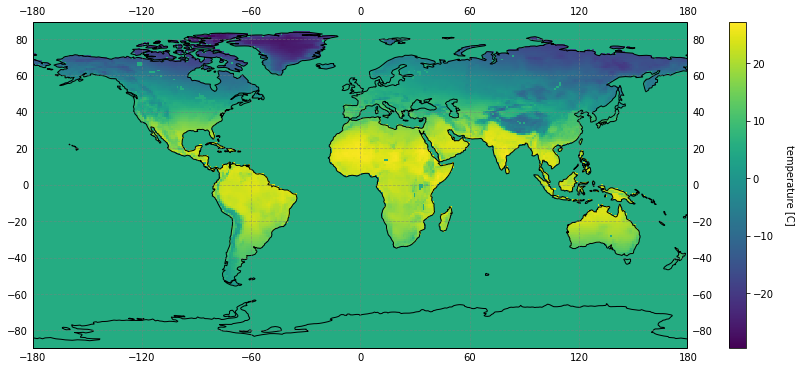

In [18]:
plot_temperature(yp_20190425_dynsoil, coastlines=True)

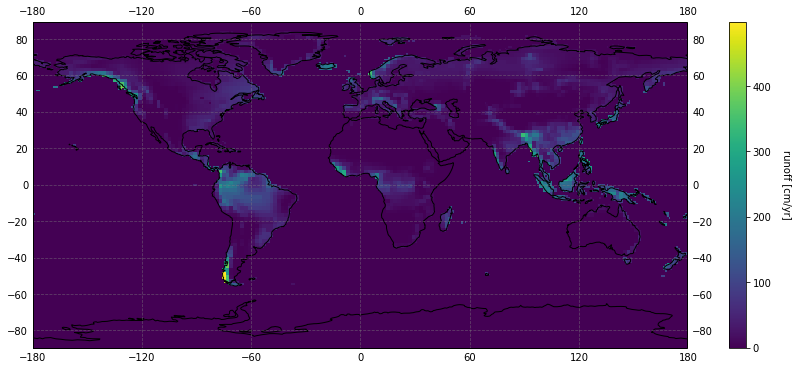

In [19]:
plot_runoff(yp_20190425_dynsoil, coastlines=True)

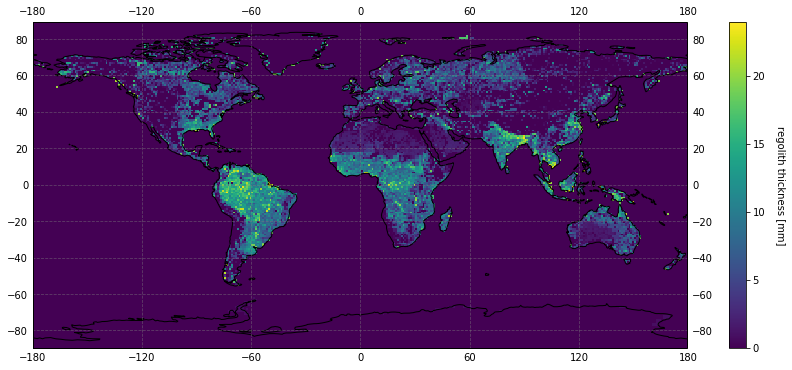

In [20]:
plot_reg_thickness(yp_20190425_dynsoil, coastlines=True)

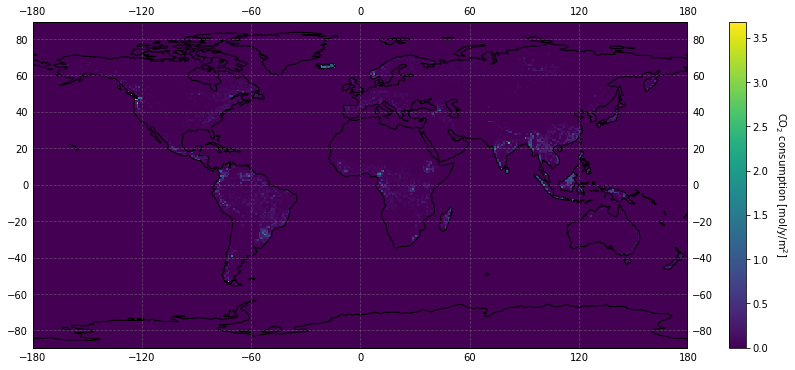

In [21]:
plot_CO2_consumption(yp_20190425_geographic, coastlines=True)

What PAL is being used?

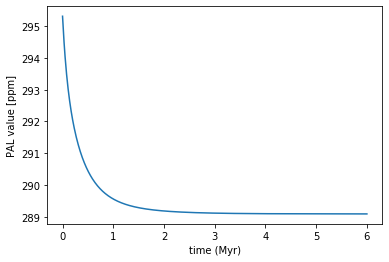

In [22]:
PAL_value = yp_20190425_GEOCLIM.variables['CO2_atm_conc'][:] / yp_20190425_GEOCLIM.variables['CO2_atm_level'][:]

fig, ax = plt.subplots()

ax.plot(yp_20190425_GEOCLIM.variables['time'][:]/1e6, PAL_value)
ax.set_xlabel('time (Myr)')
ax.set_ylabel('PAL value [ppm]')

plt.show(fig)

Note that it changes through the model run, so we should just use the ppm value.

The calibration runs:

In [23]:
calibration_CO2 = np.array([])
calibration_Fin = np.array([])
calibration_run = []

final CO2 = 188.852 ppm


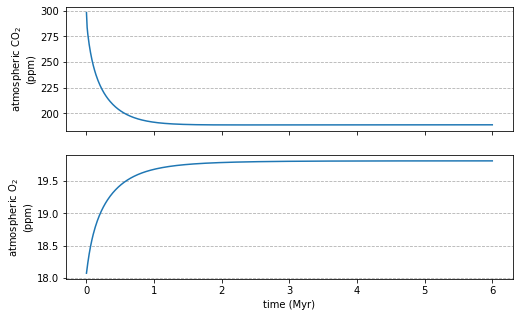

In [24]:
final_CO2 = plot_atmosphere(root+'GEOCLIM_Output/yp_20190425/')
calibration_CO2 = np.append(calibration_CO2, final_CO2)
calibration_Fin = np.append(calibration_Fin, 5.4e12)
calibration_run.append('yp_20190425')

final CO2 = 1101.525 ppm


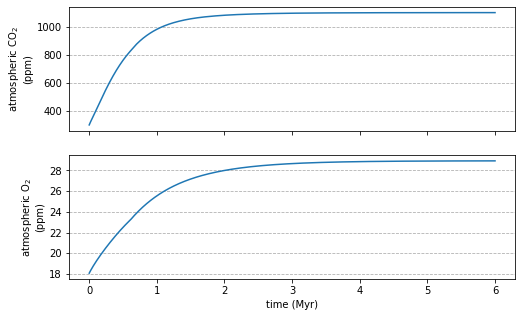

In [25]:
final_CO2 = plot_atmosphere(root+'GEOCLIM_Output/yp_20190426/')
calibration_CO2 = np.append(calibration_CO2, final_CO2)
calibration_Fin = np.append(calibration_Fin, 1.0e13)
calibration_run.append('yp_20190426')

final CO2 = 242.137 ppm


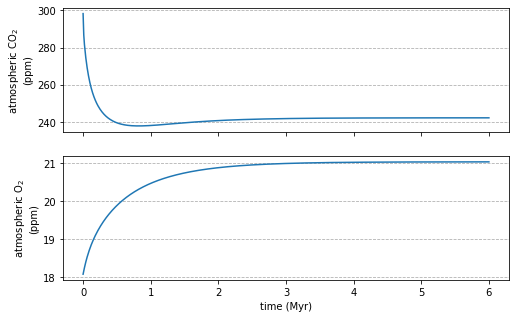

In [26]:
final_CO2 = plot_atmosphere(root+'GEOCLIM_Output/yp_20190429/')
calibration_CO2 = np.append(calibration_CO2, final_CO2)
calibration_Fin = np.append(calibration_Fin, 6.0e12)
calibration_run.append('yp_20190429')

final CO2 = 266.592 ppm


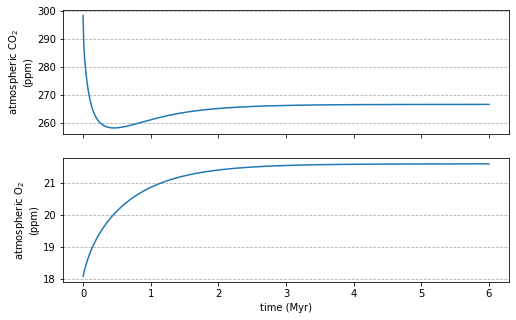

In [27]:
final_CO2 = plot_atmosphere(root+'GEOCLIM_Output/yp_20190501/')
calibration_CO2 = np.append(calibration_CO2, final_CO2)
calibration_Fin = np.append(calibration_Fin, 6.3e12)
calibration_run.append('yp_20190501')

Find where a linear interpolation between points crosses 1x PAL:

In [28]:
calibration_sort_inds = np.argsort(calibration_Fin)
calibration_CO2 = calibration_CO2[calibration_sort_inds]
calibration_Fin = calibration_Fin[calibration_sort_inds]
calibration_run_sorted = []
for i in range(len(calibration_sort_inds)):
    calibration_run_sorted.append(calibration_run[calibration_sort_inds[i]])
calibration_run = calibration_run_sorted

predicted_Fin = np.interp(280, calibration_CO2, calibration_Fin)
print('predicted F_in = {:.2E} mol/yr'.format(predicted_Fin))

predicted F_in = 6.36E+12 mol/yr


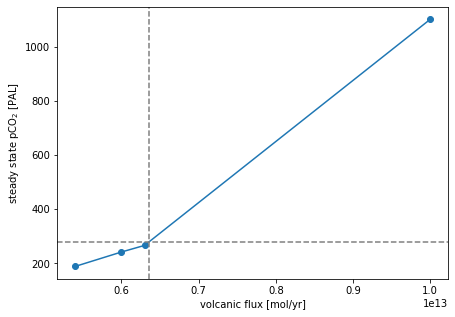

In [29]:
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(calibration_Fin, calibration_CO2, 'o-')

ax.axvline(predicted_Fin, c='C7', ls='--')
ax.axhline(280, c='C7', ls='--')

ax.set_xlabel('volcanic flux [mol/yr]')
ax.set_ylabel('steady state pCO$_{2}$ [PAL]')

plt.show(fig)

In [30]:
calibration_df = pd.DataFrame({'run':calibration_run, 'F_in':calibration_Fin, 'pCO2':calibration_CO2})
calibration_df

,run,F_in,pCO2
0,yp_20190425,5.400000e+12,188.851562
1,yp_20190429,6.000000e+12,242.137207
2,yp_20190501,6.300000e+12,266.592041
3,yp_20190426,1.000000e+13,1101.524902


### Run 2 - 370ppm baseline

Temperature and runoff data were collected over a wide range of years - we select a round number that is roughly in the middle of the range of dates over which data were collected, the CO$_{2}$ level in 2000.

In [31]:
calibration_CO2 = np.array([])
calibration_Fin = np.array([])
calibration_run = []

final CO2 = 347.522 ppm


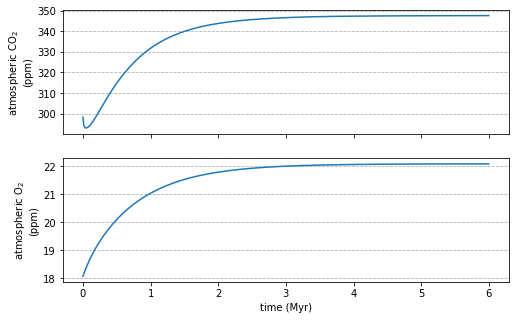

In [32]:
final_CO2 = plot_atmosphere(root+'GEOCLIM_Output/yp_20190516/')
calibration_CO2 = np.append(calibration_CO2, final_CO2)
calibration_Fin = np.append(calibration_Fin, 6.3e12)
calibration_run.append('yp_20190516')

final CO2 = 244.802 ppm


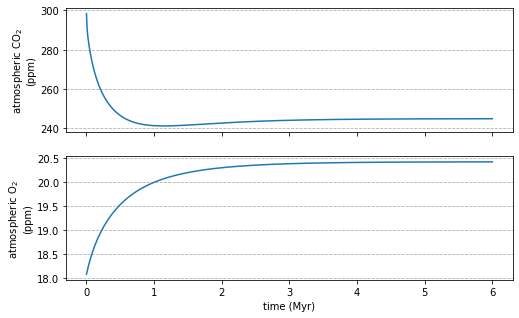

In [33]:
final_CO2 = plot_atmosphere(root+'GEOCLIM_Output/yp_20190522/')
calibration_CO2 = np.append(calibration_CO2, final_CO2)
calibration_Fin = np.append(calibration_Fin, 5.5e12)
calibration_run.append('yp_20190522')

final CO2 = 285.818 ppm


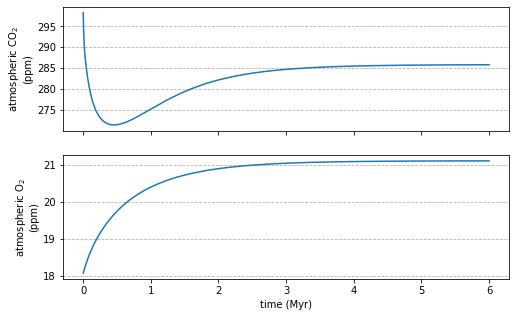

In [34]:
final_CO2 = plot_atmosphere(root+'GEOCLIM_Output/yp_20190527/')
calibration_CO2 = np.append(calibration_CO2, final_CO2)
calibration_Fin = np.append(calibration_Fin, 5.8e12)
calibration_run.append('yp_20190527')

final CO2 = 481.671 ppm


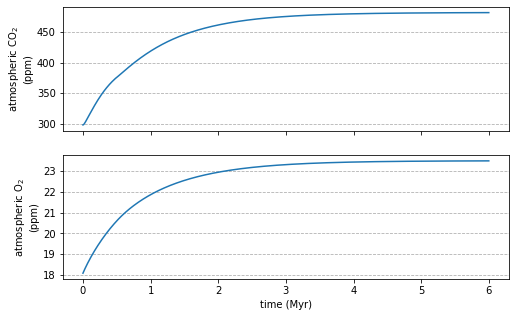

In [35]:
final_CO2 = plot_atmosphere(root+'GEOCLIM_Output/yp_20190603/')
calibration_CO2 = np.append(calibration_CO2, final_CO2)
calibration_Fin = np.append(calibration_Fin, 7.0e12)
calibration_run.append('yp_20190603')

final CO2 = 358.533 ppm


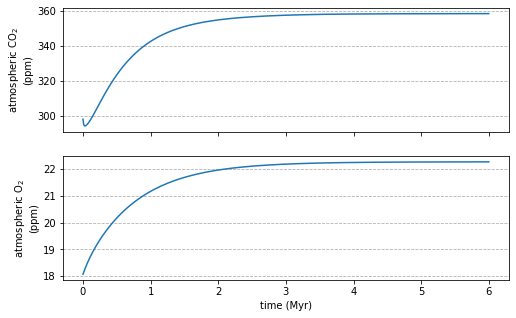

In [36]:
final_CO2 = plot_atmosphere(root+'GEOCLIM_Output/yp_20190604/')
calibration_CO2 = np.append(calibration_CO2, final_CO2)
calibration_Fin = np.append(calibration_Fin, 6.4e12)
calibration_run.append('yp_20190604')

In [37]:
calibration_sort_inds = np.argsort(calibration_Fin)
calibration_CO2 = calibration_CO2[calibration_sort_inds]
calibration_Fin = calibration_Fin[calibration_sort_inds]
calibration_run_sorted = []
for i in range(len(calibration_sort_inds)):
    calibration_run_sorted.append(calibration_run[calibration_sort_inds[i]])
calibration_run = calibration_run_sorted

predicted_Fin = np.interp(370, calibration_CO2, calibration_Fin)
print('predicted F_in = {:.2E} mol/yr'.format(predicted_Fin))

predicted F_in = 6.46E+12 mol/yr


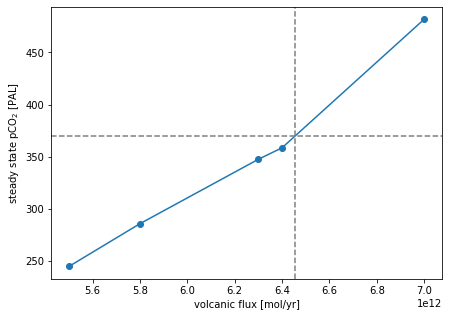

In [38]:
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(calibration_Fin, calibration_CO2, 'o-')

ax.axvline(predicted_Fin, c='C7', ls='--')
ax.axhline(370, c='C7', ls='--')

ax.set_xlabel('volcanic flux [mol/yr]')
ax.set_ylabel('steady state pCO$_{2}$ [PAL]')

plt.show(fig)

In [39]:
calibration_df = pd.DataFrame({'run':calibration_run, 'F_in':calibration_Fin, 'pCO2':calibration_CO2})
calibration_df

,run,F_in,pCO2
0,yp_20190522,5.500000e+12,244.801514
1,yp_20190527,5.800000e+12,285.818207
2,yp_20190516,6.300000e+12,347.521698
3,yp_20190604,6.400000e+12,358.533447
4,yp_20190603,7.000000e+12,481.671356


## Observed Basin Data

In Maffre et al. (2018), model and data are compared in units of t/km$^{2}$/yr. There are a few things worth noting about this:
* he uses mass of Ca+Mg+Na+K. This does not actually represent the long term carbon sequestration flux (since Na and K do not form carbonates). Furthermore, you would need to know the relative proportion of each of these cations in order to convert to molar CO$_{2}$ consumption - information that is often not readily available. However, weathering databases tend to present data as Ca+Mg+Na+K, so this is why it was used.
* `cation_sil` in `basin_data` has units of t/yr of Ca+Mg+Na+K
* GEOCLIM outputs CO$_{2}$ consumption (i.e. Ca+Mg) as mol/yr. To convert this to mass of Ca+Mg+Na+K, Pierre assumes a constant:

$$
\frac{mol(Ca+Mg)}{mass(Ca+Mg+Na+K)} = 12.5 mol/kg
$$

* the above constant comes from Gaillardet et al. (1999) Table 3, where the world average of silicate Ca+Mg (2500e9 mol/yr) is compared to the world average of silicate Ca+Mg+Na+K (200e6 t/yr). As we can see from the plot below, the value of 12.5 mol/kg is close to the mean of the individual basin data, but there is substantial spread in this value from basin to basin.

mean = 13.00
mode = 11.00
std  = 2.97


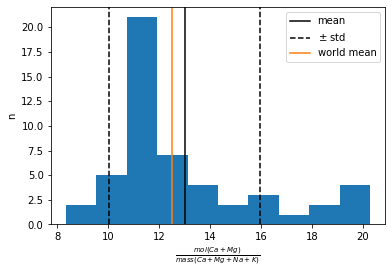

In [40]:
Gaillardet1999a_Table3 = pd.read_csv(root+'GEOCLIM_Output/weathering_basins/Gaillardet1999a_Table3.csv')

# get rid of the world average row
Gaillardet1999a_Table3 = Gaillardet1999a_Table3[Gaillardet1999a_Table3['Basins']!='World average']

# plot that Ca+Mg / Ca+Mg+Na+K ratio
CaMg_CaMgNaK = Gaillardet1999a_Table3['silicates_Ca+Mg_sil']/Gaillardet1999a_Table3['silicates_Cation_sil']
mean_CaMg_CaMgNaK = np.mean(CaMg_CaMgNaK)
mode_CaMg_CaMgNaK = stats.mode(CaMg_CaMgNaK).mode[0]
std_CaMg_CaMgNaK = np.std(CaMg_CaMgNaK)
print('mean = {:.2f}'.format(mean_CaMg_CaMgNaK))
print('mode = {:.2f}'.format(mode_CaMg_CaMgNaK))
print('std  = {:.2f}'.format(std_CaMg_CaMgNaK))

fig, ax = plt.subplots()

ax.hist(CaMg_CaMgNaK)
ax.axvline(mean_CaMg_CaMgNaK, c='k', label='mean')
ax.axvline(mean_CaMg_CaMgNaK-std_CaMg_CaMgNaK, c='k', ls='--', label='$\pm$ std')
ax.axvline(mean_CaMg_CaMgNaK+std_CaMg_CaMgNaK, c='k', ls='--', label='_nolabel')
ax.axvline(12.5, c='C1', label='world mean')

ax.set_xlabel('$\\frac{mol(Ca+Mg)}{mass(Ca+Mg+Na+K)}$')
ax.set_ylabel('n')
ax.legend()

plt.show(fig)

### 1: Gaillardet et al. (1999) and HYBAM

Basin masks:

In [41]:
basin_mask = Dataset(root+'GEOCLIM_Output/weathering_basins/riverbasin_Gaillardet+HYBAM-NEW.nc')
basin_mask.variables.keys()

odict_keys(['lon', 'lat', 'area', 'amazon', 'changjiang', 'mississippi', 'irrawady', 'ganges', 'danube', 'yenissei', 'salween', 'mackenzie', 'st_lawrence', 'lena', 'xijiang', 'ob', 'parana', 'mekong', 'congo', 'rhine', 'yukon', 'orinoco', 'magdalena', 'columbia', 'indus', 'weser', 'don', 'nelson', 'godavari', 'n_dvina', 'wisla', 'amur', 'huanghe', 'rhone', 'shatt_el_arab', 'honghe', 'po', 'fly', 'elbe', 'tocantins', 'dnepr', 'sepik', 'nile', 'narmada', 'murray', 'purari', 'panuco', 'fraser', 'mahanadi', 'kolima', 'odra', 'krishna', 'pechora', 'niger', 'ebro', 'uruguay', 'kuskowin', 'cauveri', 'zambese', 'khatanga', 'seine', 'nemanus', 'kikori', 'limpopo', 'ABA', 'ALT', 'ATA', 'BEL', 'BOR', 'CAI', 'CAR', 'CES', 'CHA', 'DJI', 'EXU', 'FAZ', 'FOR', 'GUA', 'ITA', 'JHE', 'LAB', 'MAN', 'MIR', 'NLO', 'NRO', 'NYO', 'OBI', 'PCH', 'PSI', 'PUN', 'PVE', 'PVI', 'RUR', 'SAN', 'SEB', 'SER', 'SRE', 'TAB', 'TAM', 'VGR', 'canete', 'ocona', 'santa', 'tumbes', 'esmeraldas'])

The netCDF file below contains data related to each of the basins in the mask above:
* `area` data (km$^{2}$)
    * for global rivers, is coming from Gaillardet et al. (1999) Table 1, combining the Ganges and Brahmaputra
    * for HYBAM, is coming from HYBAM data .csv, after correction for nested watersheds
    * for Pacific basins, is coming from HYBAM data .csv
* `discharge` data (km$^{3}$/yr)
    * for global rivers, is coming from Gaillardet et al. (1999) Table 1, combining the Ganges and Brahmaputra
    * for HYBAM, is coming from HYBAM data .csv, after correction for nested watersheds
    * for Pacific basins, is coming from the supplemental to Moquet et al. (2018)
* `cation_sil` data (Mt/yr of Ca+Mg+Na+K)
    * for global rivers, is coming from Gaillardet et al. (1999) Table 3, combining the Ganges and Brahmaputra
    * for HYBAM, is coming from HYBAM data .csv, after correction for nested watersheds
    * for Pacific basins, is coming from HYBAM data .csv
    
Note:
* I have not replaced Ganges and Brahmaputra CO$_{2}$ consumption value with that of Galy and France-Lanord (1999)

In [42]:
basin_data_1_nc = Dataset(root+'GEOCLIM_Output/weathering_basins/weathering_Gaillardet+HYBAM_2.nc')
basin_data_1_nc.variables.keys()

odict_keys(['basin', 'area', 'discharge', 'TSS', 'cation_sil'])

Convert the basin data into a dataframe:

In [43]:
# pull out the basin names
basin_names_1 = []
for i in range(len(basin_data_1_nc.variables['basin'].ncattrs())):
    basin_names_1.append(getattr(basin_data_1_nc.variables['basin'], basin_data_1_nc.variables['basin'].ncattrs()[i]))
    
# create the dataframe
basin_data_1 = pd.DataFrame({'basin':basin_names_1,
                             'area':basin_data_1_nc.variables['area'][:].data,
                             'discharge':basin_data_1_nc.variables['discharge'][:].data,
                             'CaMgNaK_sil':basin_data_1_nc.variables['cation_sil'][:].data})

# get rid of fill values
basin_data_1.loc[basin_data_1['area']>1e36, 'area'] = np.nan
basin_data_1.loc[basin_data_1['discharge']>1e36, 'discharge'] = np.nan
basin_data_1.loc[basin_data_1['CaMgNaK_sil']>1e36, 'CaMgNaK_sil'] = np.nan

# get rid of those basins without cation data
basin_data_1 = basin_data_1[np.isfinite(basin_data_1['CaMgNaK_sil'])]

# get rid of the Don River and VGR (as per Maffre et al., 2018 Appendix B)
basin_data_1 = basin_data_1[basin_data_1['basin']!='Don']
basin_data_1 = basin_data_1[basin_data_1['basin']!='VGR']
basin_data_1.reset_index(drop=True, inplace=True)

# add Esmeraldas from HYBAM data .csv
basin_data_1.loc[basin_data_1.index.max()+1] = ['esmeraldas', 19000, 857e-9*60*60*24*365.25, (20.2/1e6)*19000]

# get the basin names again, before they get altered below
basin_names_1 = basin_data_1['basin'].to_list()

# make it match the spelling in Gaillardet et al. (1999) Table 3
for i in range(len(basin_names_1)):
    basin_names_1[i] = basin_names_1[i].replace('Yenissei', 'Yenisei')
    basin_names_1[i] = basin_names_1[i].replace('Congo', 'Congo-Zaire')
    basin_names_1[i] = basin_names_1[i].replace('Huang He', 'Huanghe')
    basin_names_1[i] = basin_names_1[i].replace('Shatt el arab', 'Shatt el Arab')
    basin_names_1[i] = basin_names_1[i].replace('Yenissei', 'Yenisei')
    
# get silicate Ca+Mg (for HYBAM, use 12.5 mol/kg)
mean_mol_kg = 12.5
for i in range(len(basin_names_1)):
    Gaillardet1999a_row = Gaillardet1999a_Table3[Gaillardet1999a_Table3['Basins']==basin_names_1[i]]
    if len(Gaillardet1999a_row.index)!=0:
        basin_data_1.loc[i,'CaMg_sil'] = Gaillardet1999a_row['silicates_Ca+Mg_sil'].values[0]
    else:
        basin_data_1.loc[i,'CaMg_sil'] = (basin_data_1['CaMgNaK_sil'][i]*1e6*1e3 * mean_mol_kg) / 1e9

# change basin names to match the formatting (and typos) in the basin mask
for i in range(49):
    basin_data_1.loc[i, 'basin'] = basin_data_1['basin'][i].lower()
    basin_data_1.loc[i, 'basin'] = basin_data_1['basin'][i].replace('.', '')
    basin_data_1.loc[i, 'basin'] = basin_data_1['basin'][i].replace(' ', '_')
    basin_data_1.loc[i, 'basin'] = basin_data_1['basin'][i].replace('huang_he', 'huanghe')
    basin_data_1.loc[i, 'basin'] = basin_data_1['basin'][i].replace('hong_he', 'honghe')
    basin_data_1.loc[i, 'basin'] = basin_data_1['basin'][i].replace('congo-zaire', 'congo')
    basin_data_1.loc[i, 'basin'] = basin_data_1['basin'][i].replace('murray_darling', 'murray')
    basin_data_1.loc[i, 'basin'] = basin_data_1['basin'][i].replace('yenisei', 'yenissei')
    basin_data_1.loc[i, 'basin'] = basin_data_1['basin'][i].replace('kuskokwin', 'kuskowin')
    
# convert units of CaMgNaK_sil from Mt/yr to t/yr
basin_data_1['CaMgNaK_sil'] = basin_data_1['CaMgNaK_sil'] * 1e6

# store the source of the data
for i in range(len(basin_data_1.index)):
    if i <= 48:
        basin_data_1.loc[i, 'source'] = 'Gaillardet et al. (1999)'
    elif i <= 75:
        basin_data_1.loc[i, 'source'] = 'HYBAM Amazon'
    else:
        basin_data_1.loc[i, 'source'] = 'HYBAM Pacific'
        
# normalize to area
basin_data_1['CaMg_sil_norm'] = basin_data_1['CaMg_sil'] / basin_data_1['area']
basin_data_1['CaMgNaK_sil_norm'] = basin_data_1['CaMgNaK_sil'] / basin_data_1['area']

print('units:')
print('')
print('area        = km2')
print('discharge   = km3/yr')
print('CaMgNaK_sil = t/yr Ca+Mg+Na+K')
print('CaMg_sil    = 1e9 mol/yr Ca+Mg')

basin_data_1

units:

area        = km2
discharge   = km3/yr
CaMgNaK_sil = t/yr Ca+Mg+Na+K
CaMg_sil    = 1e9 mol/yr Ca+Mg


,basin,area,discharge,CaMgNaK_sil,CaMg_sil,source,CaMg_sil_norm,CaMgNaK_sil_norm
0,amazon,6112000.0,6590.000000,1.320000e+07,128.000000,Gaillardet et al. (1999),0.000021,2.159686
1,changjiang,1808000.0,928.000000,2.500000e+06,29.000000,Gaillardet et al. (1999),0.000016,1.382743
2,mississippi,2980000.0,580.000000,5.100000e+06,60.000000,Gaillardet et al. (1999),0.000020,1.711409
3,irrawady,410000.0,486.000000,1.710000e+07,165.000000,Gaillardet et al. (1999),0.000402,41.707318
4,ganges,1630000.0,1003.000000,9.800000e+06,130.000000,Gaillardet et al. (1999),0.000080,6.012270
5,yenissei,2590000.0,620.000000,3.200000e+06,30.000000,Gaillardet et al. (1999),0.000012,1.235521
6,mackenzie,1787000.0,308.000000,1.600000e+06,19.000000,Gaillardet et al. (1999),0.000011,0.895355
7,st_lawrence,1020000.0,337.000000,8.000000e+05,9.000000,Gaillardet et al. (1999),0.000009,0.784314
8,lena,2490000.0,525.000000,1.700000e+06,19.000000,Gaillardet et al. (1999),0.000008,0.682731
9,xijiang,437000.0,363.000000,7.000000e+05,9.000000,Gaillardet et al. (1999),0.000021,1.601831


### 2: Moon et al. (2014)

Extract the relevant information:

In [44]:
Moon2014a_Table1 = pd.read_csv(root+'GEOCLIM_Output/weathering_basins/Moon2014a_Table1.csv')
Moon2014a_Table2 = pd.read_csv(root+'GEOCLIM_Output/weathering_basins/Moon2014a_Table2.csv')

In [45]:
# create the dataframe
basin_data_2 = pd.DataFrame({'basin':Moon2014a_Table1['rivers'],
                             'area':Moon2014a_Table1['area_1e6km2'],
                             'discharge':Moon2014a_Table2['discharge_km3/yr'],
                             'CaMg_sil':Moon2014a_Table2['CaMg_flux_silicate_1e9mol/yr']})

# convert units of area from 1e6km^2 to km^2
basin_data_2['area'] = basin_data_2['area']*1e6

# change basin names to match the formatting (and typos) in the basin mask
for i in range(len(basin_data_2)):
    basin_data_2.loc[i, 'basin'] = basin_data_2['basin'][i].lower()
    basin_data_2.loc[i, 'basin'] = basin_data_2['basin'][i].replace('.', '')
    basin_data_2.loc[i, 'basin'] = basin_data_2['basin'][i].replace(' ', '_')
    basin_data_2.loc[i, 'basin'] = basin_data_2['basin'][i].replace('cauvery', 'cauveri')
    basin_data_2.loc[i, 'basin'] = basin_data_2['basin'][i].replace('kolyma', 'kolima')
    basin_data_2.loc[i, 'basin'] = basin_data_2['basin'][i].replace('odraoder', 'odra')
    basin_data_2.loc[i, 'basin'] = basin_data_2['basin'][i].replace('stlawrence', 'st_lawrence')
    basin_data_2.loc[i, 'basin'] = basin_data_2['basin'][i].replace('yenisey', 'yenissei')
    
# create a CaMgNaK_sil column, using the 12.5 mol/kg average
basin_data_2['CaMgNaK_sil'] = ((basin_data_2['CaMg_sil']*1e9) / mean_mol_kg) / 1000
    
# add the source column
for i in range(len(basin_data_2.index)):
    basin_data_2.loc[i, 'source'] = 'Moon et al. (2014)'
    
# print the names of the basins that do not have data
print('basins that do not have data:')
print('')
for i in range(len(basin_data_2)):
    if ~np.isfinite(basin_data_2['CaMg_sil'][i]):
        print(basin_data_2['basin'][i])
print('')
    
# for now, get rid of basins that aren't in the basin mask
print('basins that do not have a mask:')
print('')
drop_inds = np.array([])
for i in range(len(basin_data_2)):
    if basin_data_2['basin'][i] not in basin_mask.variables.keys():
        drop_inds = np.append(drop_inds, i)
        print(basin_data_2['basin'][i])
print('')
basin_data_2.drop(drop_inds, inplace=True)

# then get rid of basins that don't have data
basin_data_2.dropna(inplace=True)
basin_data_2.reset_index(drop=True, inplace=True)

# normalize to area
basin_data_2['CaMg_sil_norm'] = basin_data_2['CaMg_sil'] / basin_data_2['area']
basin_data_2['CaMgNaK_sil_norm'] = basin_data_2['CaMgNaK_sil'] / basin_data_2['area']

print('units:')
print('')
print('area        = km2')
print('discharge   = km3/yr')
print('CaMg_sil    = 1e9 mol/yr Ca+Mg')
print('CaMgNaK_sil = t/yr Ca+Mg+Na+K')

basin_data_2

basins that do not have data:

hudson
indus
lena
niger
seine
st_lawrence
tapti

basins that do not have a mask:

colorado
dalalven
garonne
glama
guadiana
hudson
nevanarva
laplata
riogrande
tapti
vistula

units:

area        = km2
discharge   = km3/yr
CaMg_sil    = 1e9 mol/yr Ca+Mg
CaMgNaK_sil = t/yr Ca+Mg+Na+K


,basin,area,discharge,CaMg_sil,CaMgNaK_sil,source,CaMg_sil_norm,CaMgNaK_sil_norm
0,cauveri,84000.0,5.54,3.89,311200.0,Moon et al. (2014),0.000046,3.704762
1,changjiang,1458000.0,688.21,40.09,3207200.0,Moon et al. (2014),0.000027,2.199726
2,columbia,630000.0,208.13,17.05,1364000.0,Moon et al. (2014),0.000027,2.165079
3,danube,181000.0,71.60,5.78,462400.0,Moon et al. (2014),0.000032,2.554696
4,ebro,13000.0,4.48,1.76,140800.0,Moon et al. (2014),0.000135,10.830769
5,godavari,312000.0,55.11,27.02,2161600.0,Moon et al. (2014),0.000087,6.928205
6,huanghe,988000.0,23.18,16.55,1324000.0,Moon et al. (2014),0.000017,1.340081
7,kolima,653000.0,190.95,6.08,486400.0,Moon et al. (2014),0.000009,0.744870
8,krishna,270000.0,13.44,4.81,384800.0,Moon et al. (2014),0.000018,1.425185
9,limpopo,201000.0,1.72,0.27,21600.0,Moon et al. (2014),0.000001,0.107463


### 3: Combined

In this version, we use the Gaillardet et al. (1999) and HYBAM data, but update the values for all basins that have values in Moon et al. (2014).

First, see what the differences are between the two sources:

In [46]:
source_diff_basin = []
source_diff_area_G1999 = np.array([])
source_diff_discharge_G1999 = np.array([])
source_diff_CaMg_sil_G1999 = np.array([])
source_diff_CaMgNaK_sil_G1999 = np.array([])
source_diff_area_M2014 = np.array([])
source_diff_discharge_M2014 = np.array([])
source_diff_CaMg_sil_M2014 = np.array([])
source_diff_CaMgNaK_sil_M2014 = np.array([])

for i in range(len(basin_data_1)):
    if basin_data_1['basin'][i] in basin_data_2['basin'].values:
        source_diff_basin.append(basin_data_1['basin'][i])
        
        source_diff_area_G1999 = np.append(source_diff_area_G1999, basin_data_1['area'][i])
        source_diff_discharge_G1999 = np.append(source_diff_discharge_G1999, basin_data_1['discharge'][i])
        source_diff_CaMg_sil_G1999 = np.append(source_diff_CaMg_sil_G1999, basin_data_1['CaMg_sil'][i])
        source_diff_CaMgNaK_sil_G1999 = np.append(source_diff_CaMgNaK_sil_G1999, basin_data_1['CaMgNaK_sil'][i])
        
        basin_data_2_row = basin_data_2[basin_data_2['basin']==basin_data_1['basin'][i]]
        
        source_diff_area_M2014 = np.append(source_diff_area_M2014,
                                           basin_data_2_row['area'].values[0])
        source_diff_discharge_M2014 = np.append(source_diff_discharge_M2014,
                                                basin_data_2_row['discharge'].values[0])
        source_diff_CaMg_sil_M2014 = np.append(source_diff_CaMg_sil_M2014,
                                               basin_data_2_row['CaMg_sil'].values[0])
        source_diff_CaMgNaK_sil_M2014 = np.append(source_diff_CaMgNaK_sil_M2014,
                                                  basin_data_2_row['CaMgNaK_sil'].values[0])
        
source_diff = pd.DataFrame({'basin':source_diff_basin,
                            'area_G1999':source_diff_area_G1999,
                            'discharge_G1999':source_diff_discharge_G1999,
                            'CaMg_sil_G1999':source_diff_CaMg_sil_G1999,
                            'CaMgNaK_sil_G1999':source_diff_CaMgNaK_sil_G1999,
                            'area_M2014':source_diff_area_M2014,
                            'discharge_M2014':source_diff_discharge_M2014,
                            'CaMg_sil_M2014':source_diff_CaMg_sil_M2014,
                            'CaMgNaK_sil_M2014':source_diff_CaMgNaK_sil_M2014})

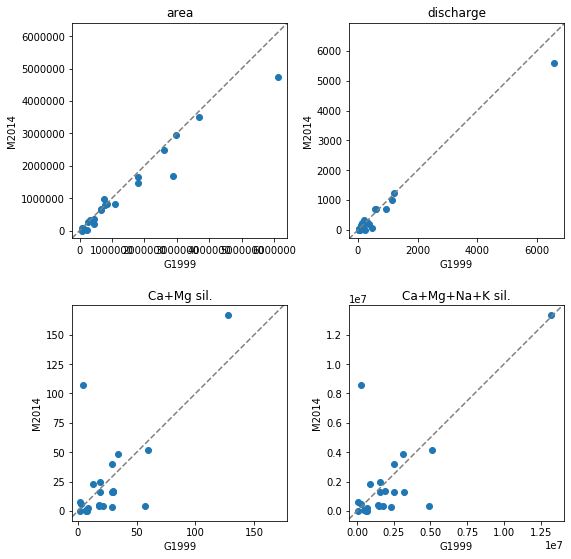

In [47]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(8,8))

ax = ax.flatten()

ax[0].scatter(source_diff['area_G1999'], source_diff['area_M2014'])
ax[0].set_title('area')

ax[1].scatter(source_diff['discharge_G1999'], source_diff['discharge_M2014'])
ax[1].set_title('discharge')

ax[2].scatter(source_diff['CaMg_sil_G1999'], source_diff['CaMg_sil_M2014'])
ax[2].set_title('Ca+Mg sil.')

ax[3].scatter(source_diff['CaMgNaK_sil_G1999'], source_diff['CaMgNaK_sil_M2014'])
ax[3].set_title('Ca+Mg+Na+K sil.')

for i in range(len(ax)):
    ax[i].axis('square')
    xlims = ax[i].get_xlim()
    ax[i].plot(np.arange(xlims[0],xlims[1]),np.arange(xlims[0],xlims[1]), ls='--', c='C7')
    ax[i].set_xlabel('G1999')
    ax[i].set_ylabel('M2014')

fig.tight_layout()
plt.show(fig)

Create the dataframe:

In [48]:
basin_data_3 = basin_data_1.copy()

# update basins that are in both Gaillardet1999a with Moon2014a
for i in range(len(basin_data_3)):
    if basin_data_3['basin'][i] in basin_data_2['basin'].values:
        basin_data_2_row = basin_data_2[basin_data_2['basin']==basin_data_3['basin'][i]]
        for col in basin_data_3.columns:
            basin_data_3.loc[i, col] = basin_data_2_row[col].values[0]
            
# add basins that are in Moon2014a only
row_ind = len(basin_data_3)
for i in range(len(basin_data_2)):
    if basin_data_2['basin'][i] not in basin_data_3['basin'].values:
        basin_data_2_row = basin_data_2[basin_data_2['basin']==basin_data_2['basin'][i]]
        for col in basin_data_3.columns:
            basin_data_3.loc[row_ind, col] = basin_data_2_row[col].values[0]
        row_ind = row_ind + 1
            
print('units:')
print('')
print('area        = km2')
print('discharge   = km3/yr')
print('CaMg_sil    = 1e9 mol/yr Ca+Mg')
print('CaMgNaK_sil = t/yr Ca+Mg+Na+K')

basin_data_3

units:

area        = km2
discharge   = km3/yr
CaMg_sil    = 1e9 mol/yr Ca+Mg
CaMgNaK_sil = t/yr Ca+Mg+Na+K


,basin,area,discharge,CaMgNaK_sil,CaMg_sil,source,CaMg_sil_norm,CaMgNaK_sil_norm
0,amazon,4724000.0,5612.420000,1.332960e+07,166.620000,Moon et al. (2014),0.000035,2.821677
1,changjiang,1458000.0,688.210000,3.207200e+06,40.090000,Moon et al. (2014),0.000027,2.199726
2,mississippi,2953000.0,697.970000,4.132800e+06,51.660000,Moon et al. (2014),0.000017,1.399526
3,irrawady,410000.0,486.000000,1.710000e+07,165.000000,Gaillardet et al. (1999),0.000402,41.707318
4,ganges,1630000.0,1003.000000,9.800000e+06,130.000000,Gaillardet et al. (1999),0.000080,6.012270
5,yenissei,2496000.0,692.180000,1.296800e+06,16.210000,Moon et al. (2014),0.000006,0.519551
6,mackenzie,1643000.0,277.810000,1.976000e+06,24.700000,Moon et al. (2014),0.000015,1.202678
7,st_lawrence,1020000.0,337.000000,8.000000e+05,9.000000,Gaillardet et al. (1999),0.000009,0.784314
8,lena,2490000.0,525.000000,1.700000e+06,19.000000,Gaillardet et al. (1999),0.000008,0.682731
9,xijiang,365000.0,209.340000,1.904000e+05,2.380000,Moon et al. (2014),0.000007,0.521644


### 4: Combined Ca+Mg

In this version, we drop the HYBAM data, since we do not have Ca+Mg data for it.

In [49]:
basin_data_4 = basin_data_3.copy()

drop_inds = np.array([])
for i in range(len(basin_data_4)):
    if 'HYBAM' in basin_data_4['source'][i]:
        drop_inds = np.append(drop_inds, i)
basin_data_4.drop(drop_inds, inplace=True)
basin_data_4.reset_index(drop=True, inplace=True)            

print('units:')
print('')
print('area        = km2')
print('discharge   = km3/yr')
print('CaMg_sil    = 1e9 mol/yr Ca+Mg')
print('CaMgNaK_sil = t/yr Ca+Mg+Na+K')

basin_data_4

units:

area        = km2
discharge   = km3/yr
CaMg_sil    = 1e9 mol/yr Ca+Mg
CaMgNaK_sil = t/yr Ca+Mg+Na+K


,basin,area,discharge,CaMgNaK_sil,CaMg_sil,source,CaMg_sil_norm,CaMgNaK_sil_norm
0,amazon,4724000.0,5612.420000,1.332960e+07,166.62,Moon et al. (2014),0.000035,2.821677
1,changjiang,1458000.0,688.210000,3.207200e+06,40.09,Moon et al. (2014),0.000027,2.199726
2,mississippi,2953000.0,697.970000,4.132800e+06,51.66,Moon et al. (2014),0.000017,1.399526
3,irrawady,410000.0,486.000000,1.710000e+07,165.00,Gaillardet et al. (1999),0.000402,41.707318
4,ganges,1630000.0,1003.000000,9.800000e+06,130.00,Gaillardet et al. (1999),0.000080,6.012270
5,yenissei,2496000.0,692.180000,1.296800e+06,16.21,Moon et al. (2014),0.000006,0.519551
6,mackenzie,1643000.0,277.810000,1.976000e+06,24.70,Moon et al. (2014),0.000015,1.202678
7,st_lawrence,1020000.0,337.000000,8.000000e+05,9.00,Gaillardet et al. (1999),0.000009,0.784314
8,lena,2490000.0,525.000000,1.700000e+06,19.00,Gaillardet et al. (1999),0.000008,0.682731
9,xijiang,365000.0,209.340000,1.904000e+05,2.38,Moon et al. (2014),0.000007,0.521644


## Basin Comparisons

### yp_20190201 (default)

Get the model output:

In [50]:
yp_20190201_dynsoil = Dataset(root+'GEOCLIM_Output/yp_20190201/dynsoil_output.test.nc')
yp_20190201_geographic = Dataset(root+'GEOCLIM_Output/yp_20190201/geographic_output.test.nc')
yp_20190201_lith_mask = unsnake_it(np.loadtxt(root+'GEOCLIM_Output/yp_20190201/lith_mask.dat'),
                                   yp_20190201_geographic.variables['lat'][:].data,
                                   yp_20190201_geographic.variables['lon'][:].data)
yp_20190201_grid_area = unsnake_it(np.loadtxt(root+'GEOCLIM_Output/yp_20190201/grid_area.dat'),
                                   yp_20190201_geographic.variables['lat'][:].data,
                                   yp_20190201_geographic.variables['lon'][:].data)

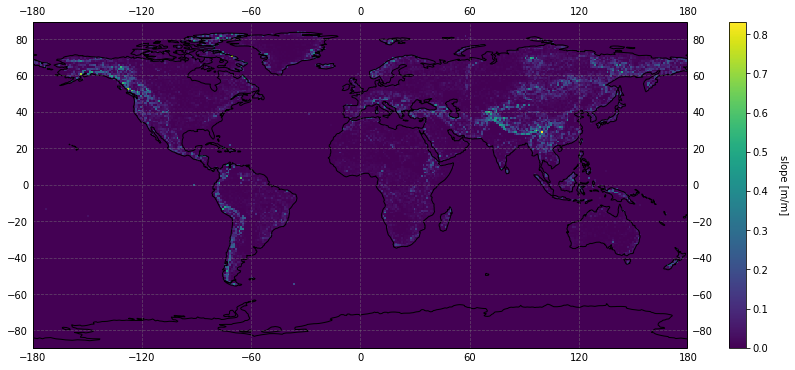

In [51]:
plot_slope(yp_20190201_dynsoil, coastlines=True)

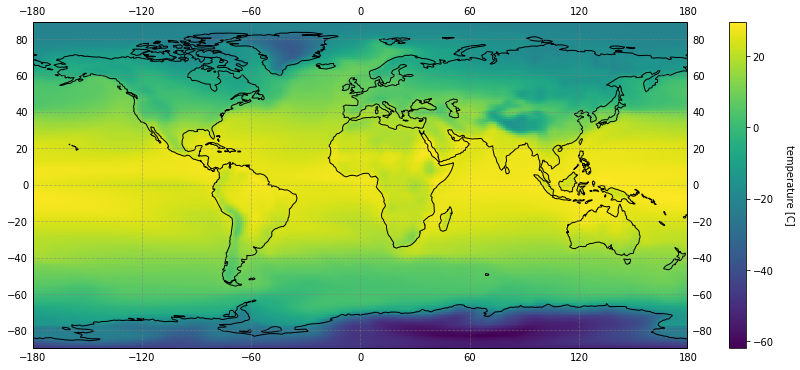

In [52]:
plot_temperature(yp_20190201_dynsoil, coastlines=True)

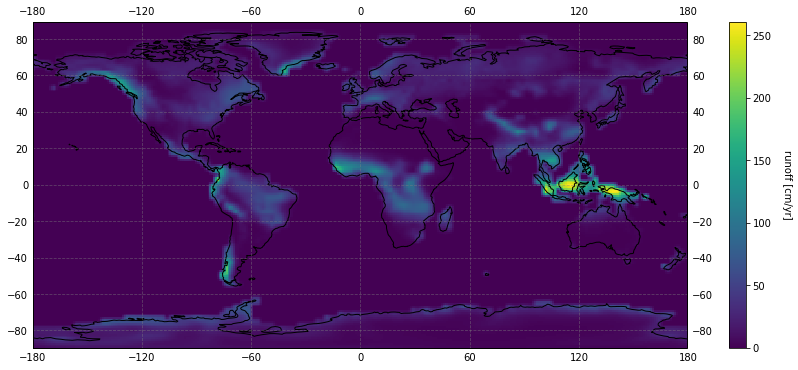

In [53]:
plot_runoff(yp_20190201_dynsoil, coastlines=True)

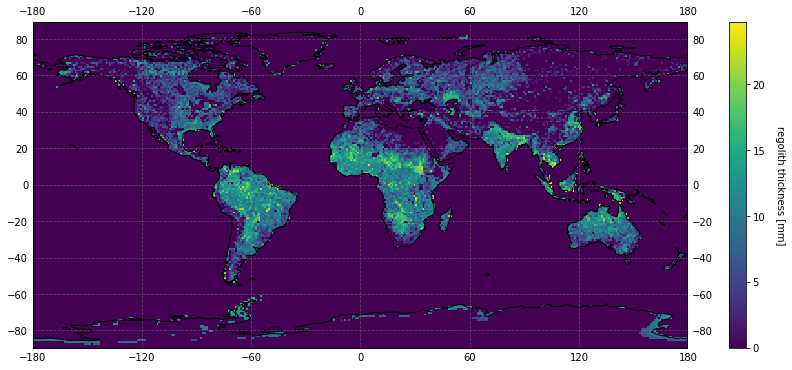

In [54]:
plot_reg_thickness(yp_20190201_dynsoil, coastlines=True)

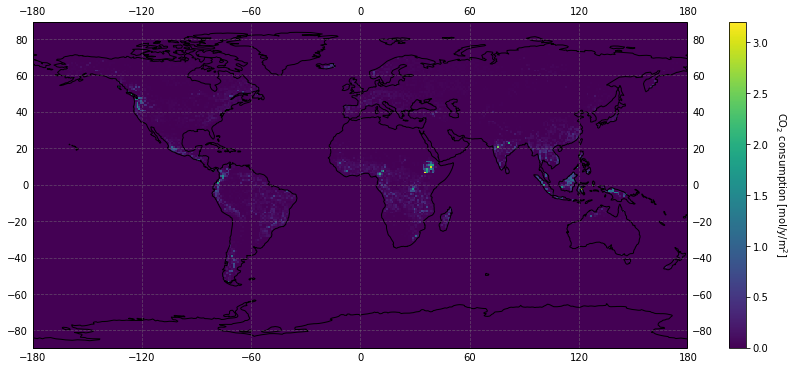

In [55]:
plot_CO2_consumption(yp_20190201_geographic, coastlines=True)

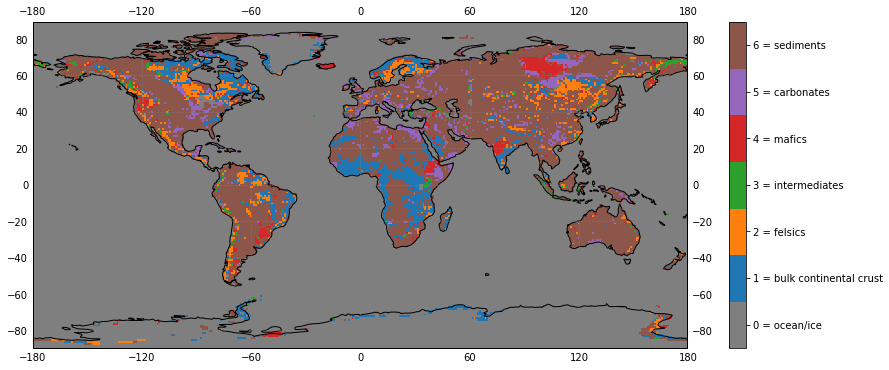

In [56]:
plot_lithology(yp_20190201_lith_mask,
               yp_20190201_geographic.variables['lat'][:].data,
               yp_20190201_geographic.variables['lon'][:].data,
               coastlines=True)

total CO2 consumption = 5.9999 e12 mol/yr


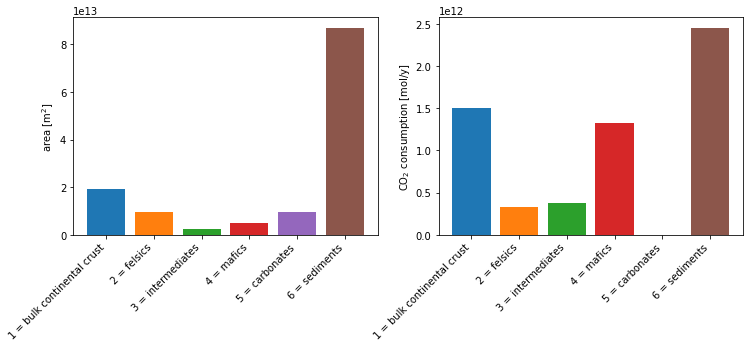

In [57]:
total_CO2_consumption(yp_20190201_geographic, yp_20190201_lith_mask, yp_20190201_grid_area)

Extract variables for each basin in the mask:

In [58]:
yp_20190201_basin_vars = extract_basin_variables(yp_20190201_dynsoil,
                                                 yp_20190201_geographic,
                                                 yp_20190201_lith_mask,
                                                 yp_20190201_grid_area)
yp_20190201_basin_vars

,basin,CaMg_sil,area,lith_area_1,lith_area_2,lith_area_3,lith_area_4,lith_area_5,lith_area_6,lith_CaMg_sil_1,lith_CaMg_sil_2,lith_CaMg_sil_3,lith_CaMg_sil_4,lith_CaMg_sil_5,lith_CaMg_sil_6,slope_mean,slope_std,slope_max,slope_min,T_mean,T_std,T_max,T_min,R_mean,R_std,R_max,R_min,CaMgNaK_sil,CaMg_sil_norm,CaMgNaK_sil_norm
0,amazon,378.118342,6.243279e+06,6.503272e+05,856775.813141,133840.737136,36957.520249,97736.895478,4.467640e+06,59.726701,54.155244,36.223165,7.282407,0.0,220.730826,0.026125,0.057240,0.492495,0.000175,24.699972,3.473045,28.451473,10.429852,39.149319,18.239231,111.691238,5.775036,3.024947e+07,6.056407e-05,4.845125
1,changjiang,93.211067,2.089776e+06,4.287311e+04,95137.438187,0.000000,21031.969227,345119.550023,1.585614e+06,9.825389,4.312117,0.000000,0.000000,0.0,79.073560,0.085984,0.104102,0.831691,0.000000,6.435396,7.923654,17.626232,-12.691276,39.864697,21.114370,93.063332,3.769485,7.456885e+06,4.460337e-05,3.568270
2,mississippi,69.877744,3.488131e+06,3.681001e+04,79127.922233,36835.679409,17018.426943,508507.214908,2.809832e+06,2.207559,0.550933,0.080042,0.911608,0.0,66.127601,0.018914,0.035071,0.375477,0.000000,6.018962,4.432995,19.372128,-1.184961,22.721809,11.880820,48.933929,3.221635,5.590219e+06,2.003300e-05,1.602640
3,irrawady,37.019579,5.107049e+05,6.710313e+04,10966.607231,0.000000,0.000000,11064.570211,4.215706e+05,5.264962,0.012572,0.000000,0.000000,0.0,31.742045,0.073596,0.089597,0.394919,0.000000,18.401676,5.551159,27.083885,1.987728,30.945873,13.721908,70.175926,12.842048,2.961566e+06,7.248723e-05,5.798978
4,ganges,61.644047,1.860273e+06,2.849879e+05,173006.119289,10760.690526,90785.840466,54097.467015,1.246635e+06,14.030078,1.532661,0.000000,14.092725,0.0,31.988583,0.083214,0.123250,0.653385,0.000175,11.978255,12.101331,24.874840,-12.735505,41.935894,23.323038,113.890015,5.524818,4.931524e+06,3.313709e-05,2.650967
5,yenissei,13.735826,2.817505e+06,1.724731e+05,410281.758994,22558.736757,758062.921188,381386.801585,1.072742e+06,0.189655,0.289997,0.099769,8.348276,0.0,4.808129,0.051816,0.059400,0.530367,0.000000,-11.362755,3.383531,-3.942998,-19.577497,18.361198,7.805023,38.779461,0.087186,1.098866e+06,4.875173e-06,0.390014
6,mackenzie,11.990035,1.885483e+06,1.411506e+05,149054.923286,62716.394506,11910.880606,70132.563080,1.450517e+06,1.491961,0.864105,0.843028,1.196391,0.0,7.594550,0.040257,0.072092,0.568079,0.000000,-5.320967,2.703683,-0.480566,-10.606359,17.413731,14.295801,79.937950,1.231063,9.592028e+05,6.359133e-06,0.508731
7,st_lawrence,67.168890,1.228080e+06,4.267935e+05,214940.872592,8192.339417,56685.182248,186920.676070,3.345471e+05,31.209193,5.456121,0.603903,17.736402,0.0,12.163271,0.017181,0.022300,0.137161,0.000000,0.345167,2.982909,6.420367,-7.219149,44.499985,14.142291,68.092178,17.997618,5.373511e+06,5.469424e-05,4.375539
8,lena,3.557543,2.690392e+06,2.798431e+05,357714.865947,26929.570962,164904.958081,541224.891398,1.319775e+06,0.275474,0.101913,0.128039,2.344850,0.0,0.707267,0.055447,0.062018,0.379265,0.000000,-14.027063,2.055835,-7.219055,-19.852419,13.351543,8.870003,35.734165,0.879871,2.846035e+05,1.322314e-06,0.105785
9,xijiang,29.575042,5.297806e+05,0.000000e+00,56943.551626,0.000000,0.000000,201749.505681,2.710875e+05,0.000000,2.636784,0.000000,0.000000,0.0,26.938258,0.057721,0.059870,0.240817,0.001396,16.697386,2.599997,21.565674,12.323889,28.251099,9.370316,50.398468,14.665555,2.366003e+06,5.582508e-05,4.466006


Match the basins between the model and the data (versions 1 through 4):

In [59]:
yp_20190201_basin_vars_1 = match_basins(yp_20190201_basin_vars, basin_data_1)

In [60]:
yp_20190201_basin_vars_2 = match_basins(yp_20190201_basin_vars, basin_data_2)

In [61]:
yp_20190201_basin_vars_3 = match_basins(yp_20190201_basin_vars, basin_data_3)

In [62]:
yp_20190201_basin_vars_4 = match_basins(yp_20190201_basin_vars, basin_data_4)

#### Cross Plots

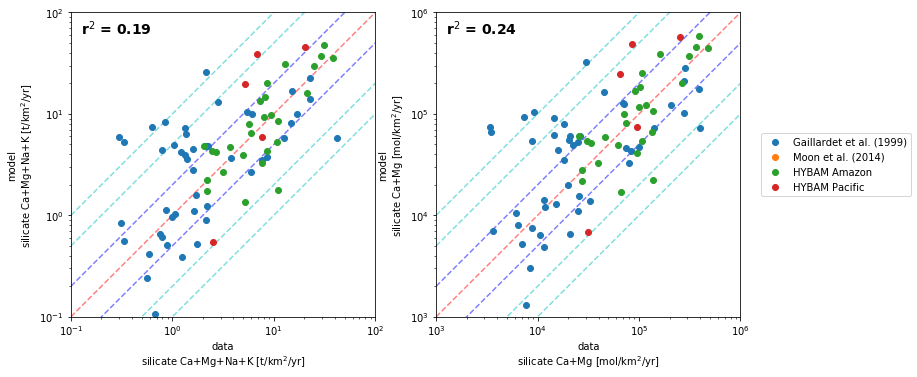

In [63]:
log_cross_plot(yp_20190201_basin_vars_1, basin_data_1)

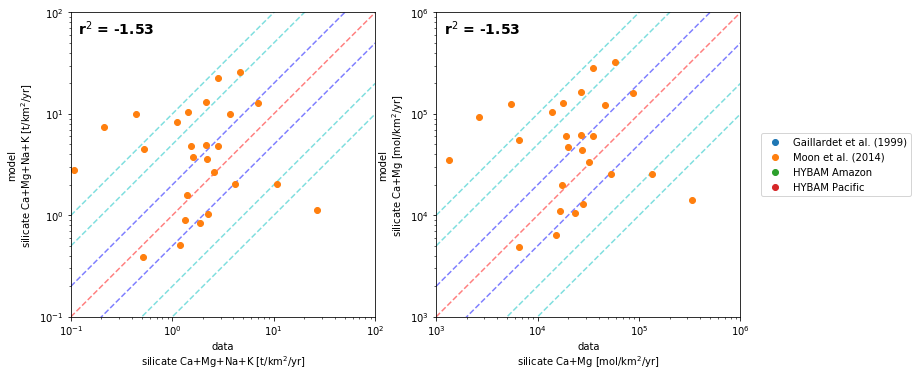

In [64]:
log_cross_plot(yp_20190201_basin_vars_2, basin_data_2)

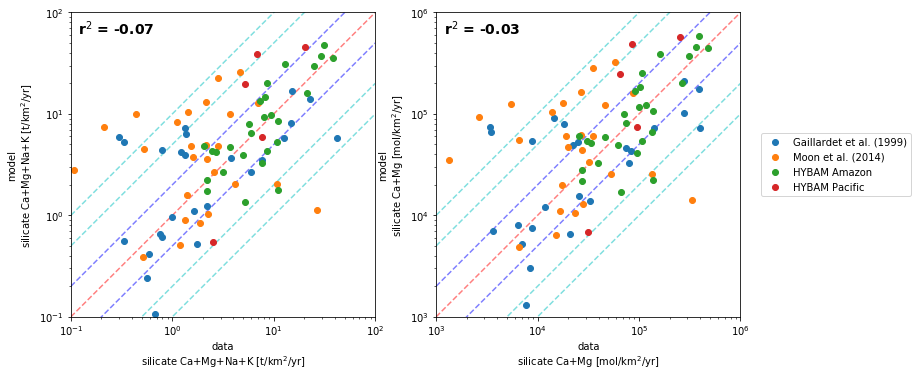

In [65]:
log_cross_plot(yp_20190201_basin_vars_3, basin_data_3)

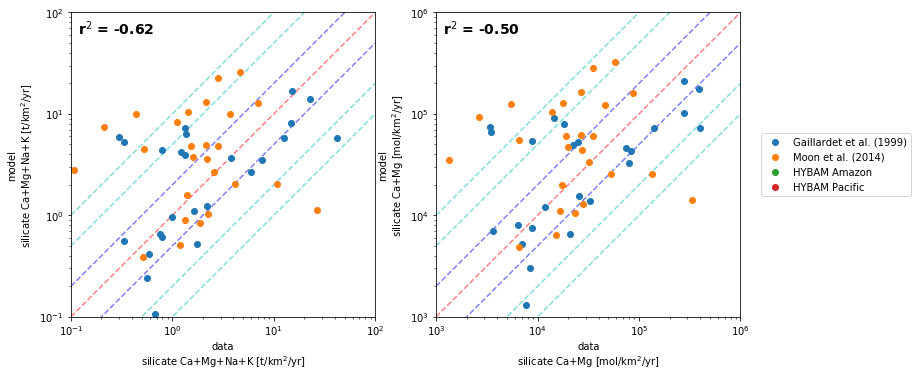

In [66]:
log_cross_plot(yp_20190201_basin_vars_4, basin_data_4)

#### Individual Basins

#### Misfits

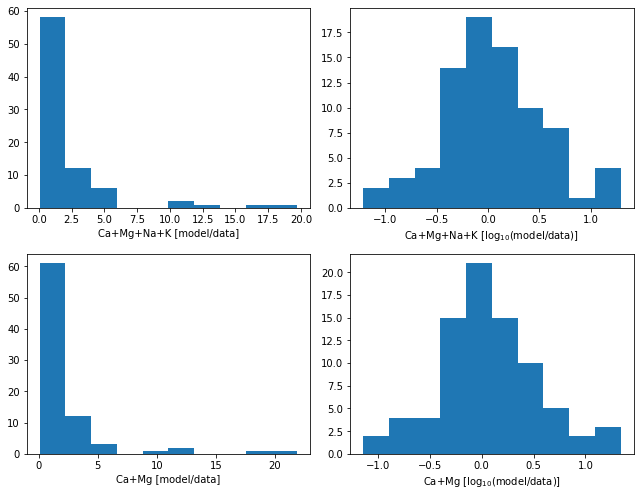

In [67]:
CaMgNaK_sil_norm_misfit_1,CaMgNaK_sil_norm_logmisfit_1,CaMg_sil_norm_misfit_1,CaMg_sil_norm_logmisfit_1 =\
get_misfit(yp_20190201_basin_vars_1, basin_data_1)

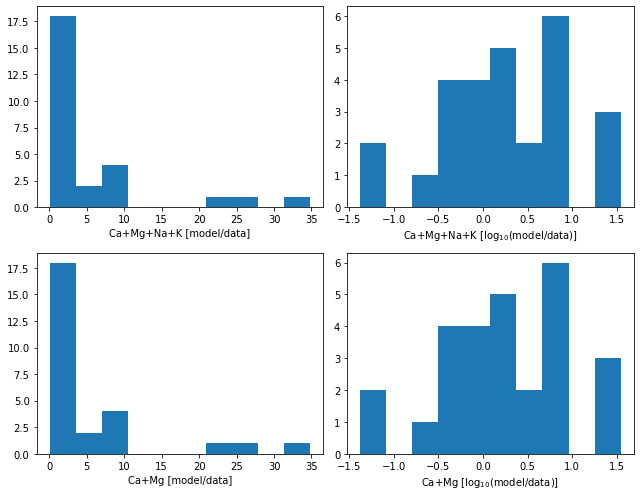

In [68]:
CaMgNaK_sil_norm_misfit_2,CaMgNaK_sil_norm_logmisfit_2,CaMg_sil_norm_misfit_2,CaMg_sil_norm_logmisfit_2 =\
get_misfit(yp_20190201_basin_vars_2, basin_data_2)

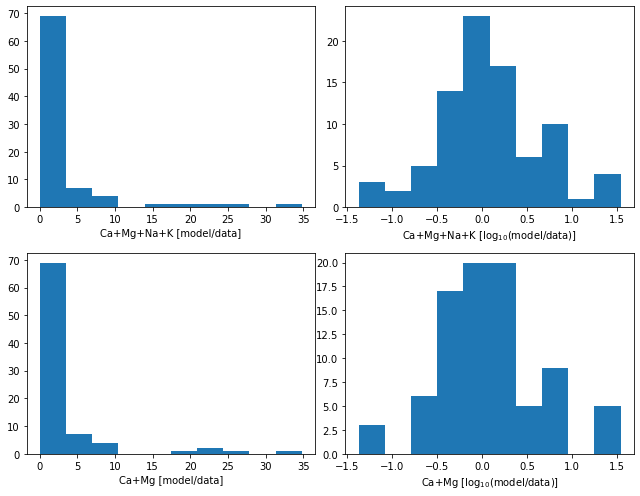

In [69]:
CaMgNaK_sil_norm_misfit_3,CaMgNaK_sil_norm_logmisfit_3,CaMg_sil_norm_misfit_3,CaMg_sil_norm_logmisfit_3 =\
get_misfit(yp_20190201_basin_vars_3, basin_data_3)

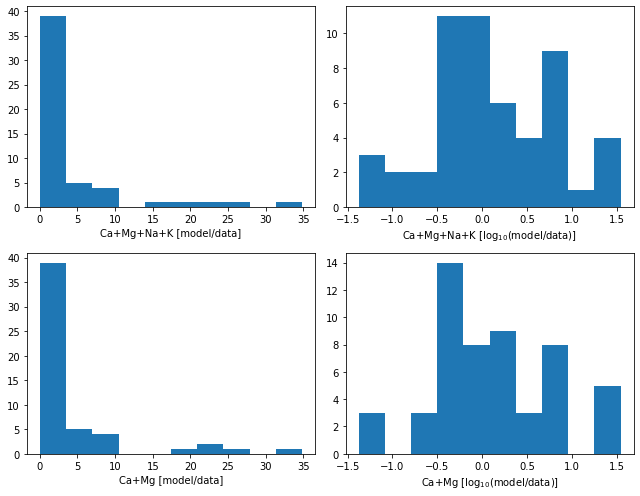

In [70]:
CaMgNaK_sil_norm_misfit_4,CaMgNaK_sil_norm_logmisfit_4,CaMg_sil_norm_misfit_4,CaMg_sil_norm_logmisfit_4 =\
get_misfit(yp_20190201_basin_vars_4, basin_data_4)

#### Correlates

Get variables that are likely to correlate with misfit:

In [77]:
# extract the variables
corr_vars = ['area',
             'lith_area_1','lith_area_2','lith_area_3','lith_area_4','lith_area_5','lith_area_6',
             'slope_mean','slope_max',
             'T_mean','T_max',
             'R_mean','R_max',
             'CaMg_sil_norm',
             'CaMgNaK_sil_norm']

yp_20190201_basin_corr_vars_1 = yp_20190201_basin_vars_1[corr_vars].copy()
yp_20190201_basin_corr_vars_2 = yp_20190201_basin_vars_2[corr_vars].copy()
yp_20190201_basin_corr_vars_3 = yp_20190201_basin_vars_3[corr_vars].copy()
yp_20190201_basin_corr_vars_4 = yp_20190201_basin_vars_4[corr_vars].copy()

# standardize the variables
scaler = StandardScaler()
yp_20190201_basin_corr_vars_1 = scaler.fit_transform(yp_20190201_basin_corr_vars_1)
scaler = StandardScaler()
yp_20190201_basin_corr_vars_2 = scaler.fit_transform(yp_20190201_basin_corr_vars_2)
scaler = StandardScaler()
yp_20190201_basin_corr_vars_3 = scaler.fit_transform(yp_20190201_basin_corr_vars_3)
scaler = StandardScaler()
yp_20190201_basin_corr_vars_4 = scaler.fit_transform(yp_20190201_basin_corr_vars_4)

# put it back into pandas dataframes
yp_20190201_basin_corr_vars_1 = pd.DataFrame(data=yp_20190201_basin_corr_vars_1, columns=corr_vars)
yp_20190201_basin_corr_vars_2 = pd.DataFrame(data=yp_20190201_basin_corr_vars_2, columns=corr_vars)
yp_20190201_basin_corr_vars_3 = pd.DataFrame(data=yp_20190201_basin_corr_vars_3, columns=corr_vars)
yp_20190201_basin_corr_vars_4 = pd.DataFrame(data=yp_20190201_basin_corr_vars_4, columns=corr_vars)

Scatter plot everything:

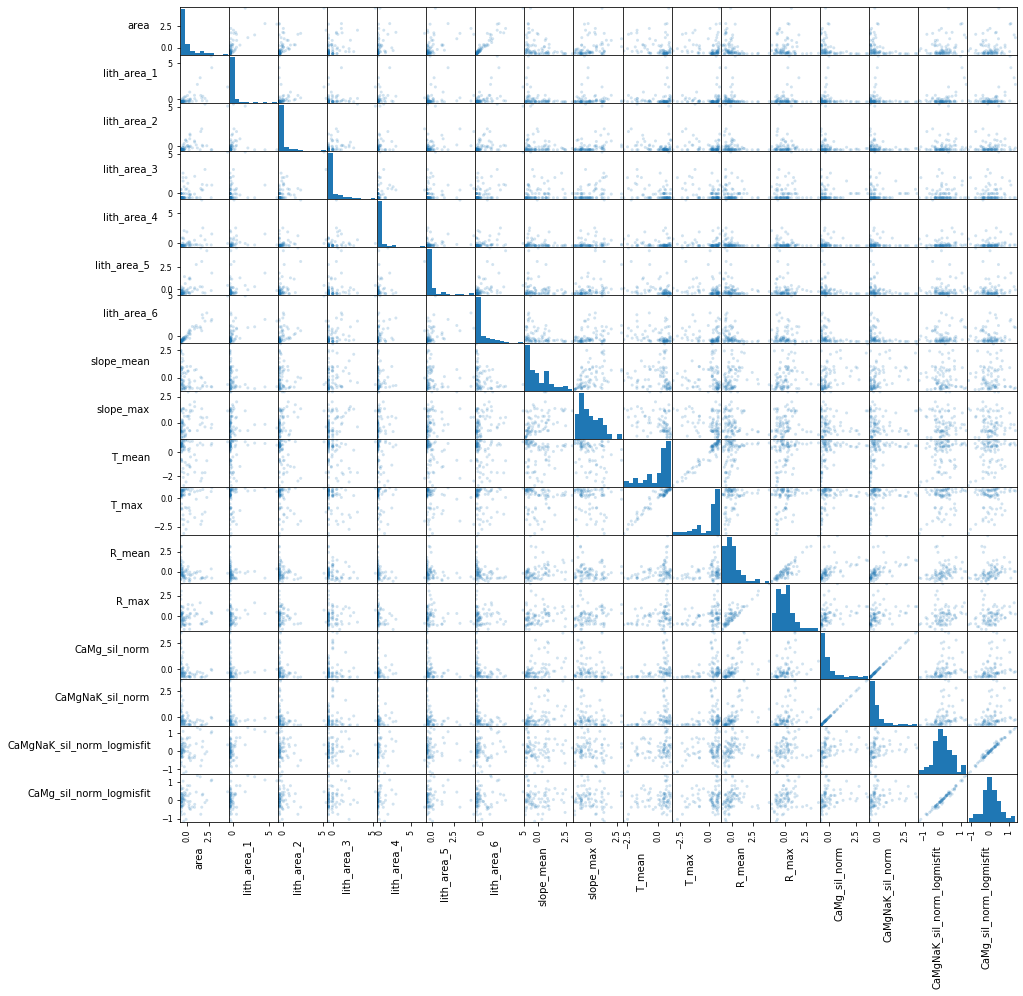

In [84]:
yp_20190201_basin_corr_vars_1_temp = yp_20190201_basin_corr_vars_1.copy()
yp_20190201_basin_corr_vars_1_temp['CaMgNaK_sil_norm_logmisfit'] = CaMgNaK_sil_norm_logmisfit_1
yp_20190201_basin_corr_vars_1_temp['CaMg_sil_norm_logmisfit'] = CaMg_sil_norm_logmisfit_1

axs = pd.plotting.scatter_matrix(yp_20190201_basin_corr_vars_1_temp, alpha=0.2, figsize=(15,15))
n = len(yp_20190201_basin_corr_vars_1_temp.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        ax.xaxis.label.set_horizontalalignment('right')
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_horizontalalignment('right')
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 10
plt.show()

Correlations:

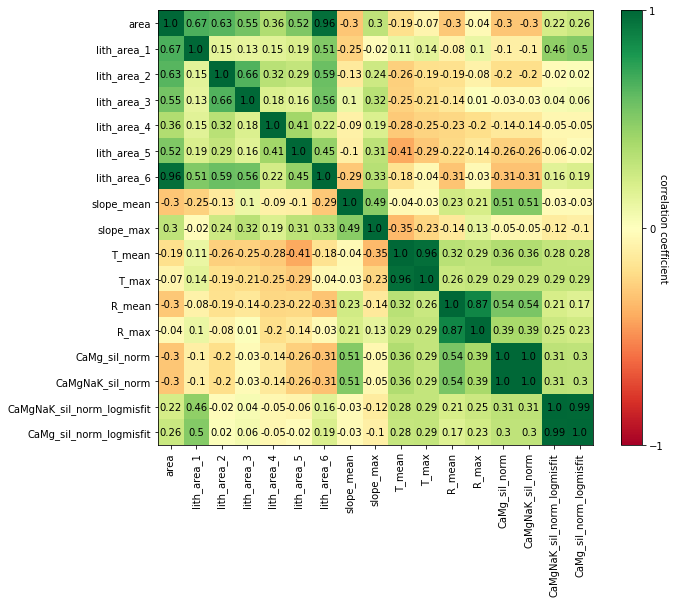

In [91]:
yp_20190201_basin_corr_vars_1_temp = yp_20190201_basin_corr_vars_1.copy()
yp_20190201_basin_corr_vars_1_temp['CaMgNaK_sil_norm_logmisfit'] = CaMgNaK_sil_norm_logmisfit_1
yp_20190201_basin_corr_vars_1_temp['CaMg_sil_norm_logmisfit'] = CaMg_sil_norm_logmisfit_1
correlation_matrix(yp_20190201_basin_corr_vars_1_temp)

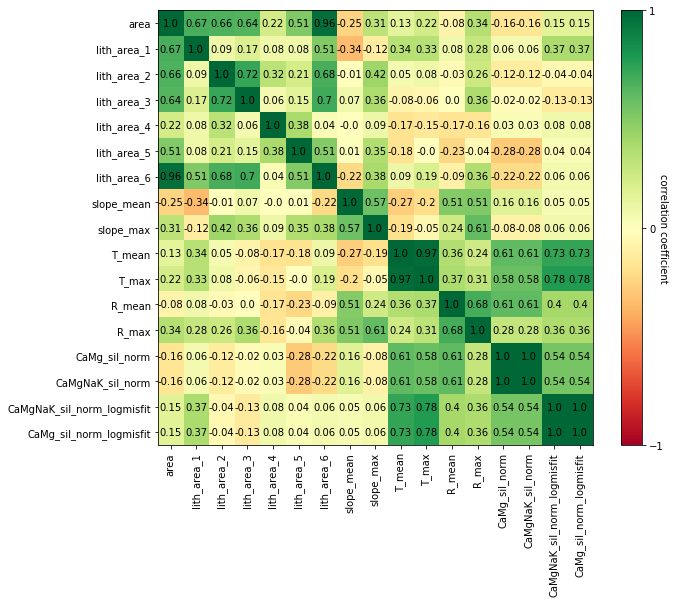

In [95]:
yp_20190201_basin_corr_vars_2_temp = yp_20190201_basin_corr_vars_2.copy()
yp_20190201_basin_corr_vars_2_temp['CaMgNaK_sil_norm_logmisfit'] = CaMgNaK_sil_norm_logmisfit_2
yp_20190201_basin_corr_vars_2_temp['CaMg_sil_norm_logmisfit'] = CaMg_sil_norm_logmisfit_2
correlation_matrix(yp_20190201_basin_corr_vars_2_temp)

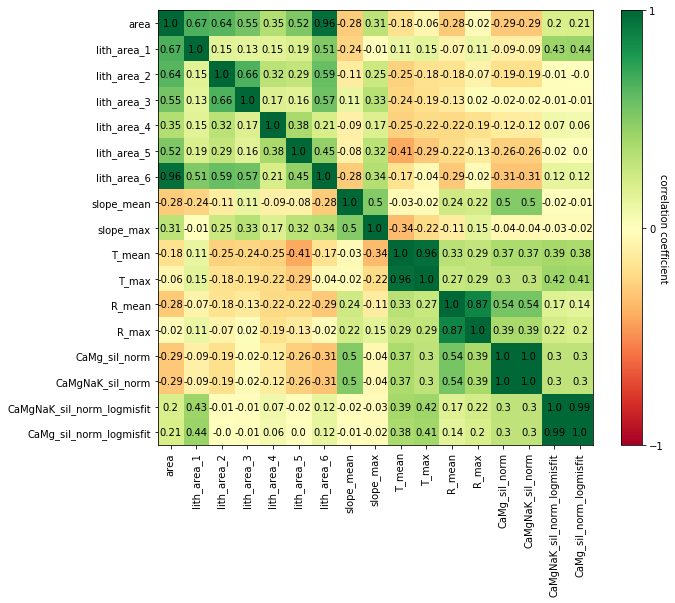

In [96]:
yp_20190201_basin_corr_vars_3_temp = yp_20190201_basin_corr_vars_3.copy()
yp_20190201_basin_corr_vars_3_temp['CaMgNaK_sil_norm_logmisfit'] = CaMgNaK_sil_norm_logmisfit_3
yp_20190201_basin_corr_vars_3_temp['CaMg_sil_norm_logmisfit'] = CaMg_sil_norm_logmisfit_3
correlation_matrix(yp_20190201_basin_corr_vars_3_temp)

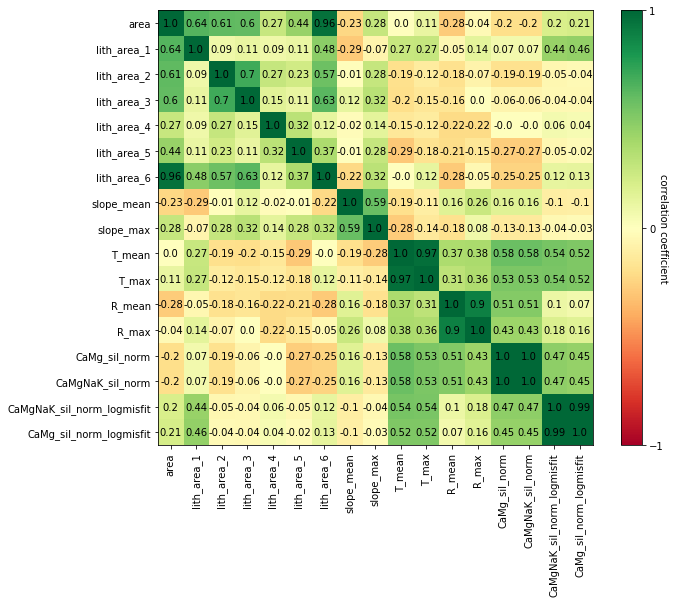

In [97]:
yp_20190201_basin_corr_vars_4_temp = yp_20190201_basin_corr_vars_4.copy()
yp_20190201_basin_corr_vars_4_temp['CaMgNaK_sil_norm_logmisfit'] = CaMgNaK_sil_norm_logmisfit_4
yp_20190201_basin_corr_vars_4_temp['CaMg_sil_norm_logmisfit'] = CaMg_sil_norm_logmisfit_4
correlation_matrix(yp_20190201_basin_corr_vars_4_temp)

#### Linear Regression

## OLD STUFF

## yp_20190201 (default)

In [ ]:
final_CO2 = plot_atmosphere('yp_20190201')
final_CO2s = np.append(final_CO2s, final_CO2)
scenarios.append('calibration')

In [ ]:
yp_20190201_dynsoil = Dataset('yp_20190201/dynsoil_output.test.nc')
yp_20190201_geographic = Dataset('yp_20190201/geographic_output.test.nc')
yp_20190201_lith_mask = unsnake_it(np.loadtxt('yp_20190201/lith_mask.dat'),
                                   yp_20190201_geographic.variables['lat'][:].data,
                                   yp_20190201_geographic.variables['lon'][:].data)
yp_20190201_grid_area = unsnake_it(np.loadtxt('yp_20190201/grid_area.dat'),
                                   yp_20190201_geographic.variables['lat'][:].data,
                                   yp_20190201_geographic.variables['lon'][:].data)

In [ ]:
plot_slope(yp_20190201_dynsoil, coastlines=True)

In [ ]:
plot_temperature(yp_20190201_dynsoil, coastlines=True)

In [ ]:
plot_runoff(yp_20190201_dynsoil, coastlines=True)

In [ ]:
plot_reg_thickness(yp_20190201_dynsoil, coastlines=True)

In [ ]:
plot_CO2_consumption(yp_20190201_geographic, coastlines=True)

In [ ]:
plot_lithology(yp_20190201_lith_mask,
               yp_20190201_geographic.variables['lat'][:].data,
               yp_20190201_geographic.variables['lon'][:].data,
               coastlines=True)

In [ ]:
total_CO2_consumption(yp_20190201_geographic, yp_20190201_lith_mask, yp_20190201_grid_area)

### Basin Comparisons

#### Extract Basin Data

In [ ]:
# CO2 consumption
model_CO2_cnsmptn_map = yp_20190201_geographic.variables['gra_wth'][-1,:,:].data.copy()
model_CO2_cnsmptn_map[np.isnan(model_CO2_cnsmptn_map)] = 0
model_CO2_cnsmptn_map[model_CO2_cnsmptn_map > 1e10] = 0

# convert from mol/yr/m2 to mol/yr (grid_area is in Mm^2)
model_CO2_cnsmptn_map = model_CO2_cnsmptn_map * (yp_20190201_grid_area * 1e12)

# slope
model_slope_map = yp_20190201_dynsoil.variables['slope'][:,:].data.copy()
model_slope_map[model_slope_map > 1e10] = 0

# temperature
model_T_map = yp_20190201_dynsoil.variables['temperature'][-1,:,:].copy()
model_T_map[model_T_map > 1e10] = 0

# runoff
model_R_map = yp_20190201_dynsoil.variables['runoff'][-1,:,:].copy()
model_R_map[model_R_map > 1e10] = 0

##### STORAGE VECTORS #####
model_basin_CO2_cnsmptn = np.zeros(len(basin_data.index))
model_basin_areas = np.zeros(len(basin_data.index))
model_basin_lith_areas = np.zeros((len(basin_data.index), 6)) # each column is a lithology
model_basin_lith_CO2_cnsmptn = np.zeros((len(basin_data.index), 6)) # each column is a lithology
model_basin_slope = np.zeros((len(basin_data.index), 4)) # columns are: mean, std, max, min
model_basin_T = np.zeros((len(basin_data.index), 4)) # columns are: mean, std, max, min
model_basin_R = np.zeros((len(basin_data.index), 4)) # columns are: mean, std, max, min

##### BASIN LOOP ##### (just the Gaillardet et al., 1999 ones for now)
for i in range(len(basin_data.index)):
    
    # pull out the basin mask
    this_basin_mask = basin_mask.variables[basin_data['basin'][i]][:,:].data.copy()
    
    # convert NaNs to zeros
    this_basin_mask[np.isnan(this_basin_mask)] = 0

    # get rid of fill values
    this_basin_mask[this_basin_mask > 1e35] = 0

    # convert remaining values (the basin mask) to 1
    this_basin_mask[this_basin_mask != 0] = 1
    
    ##### CO2 CONSUMPTION #####
    
    # change CO2 consumption to 0 everywhere that isn't in the basin
    model_basin_CO2_cnsmptn_array = model_CO2_cnsmptn_map.copy()
    model_basin_CO2_cnsmptn_array[this_basin_mask!=1] = 0
    
    # sum and store - mol/yr
    model_basin_CO2_cnsmptn[i] = np.nansum(model_basin_CO2_cnsmptn_array)
    
    ##### AREA #####
    
    # change grid area to 0 everywhere that isn't in the basin
    model_basin_areas_map = yp_20190201_grid_area.copy()
    model_basin_areas_map[this_basin_mask!=1] = 0
    
    # sum and store - converting from Mm^2 to m^2
    model_basin_areas[i] = np.nansum(model_basin_areas_map) * 1e12
    
    ##### LITHOLOGY #####
    
    # get the area of each lithology in that basin - m^2
    model_basin_lith_areas[i,0] = np.nansum(yp_20190201_grid_area[(yp_20190201_lith_mask==1)&(this_basin_mask==1)]*1e12)
    model_basin_lith_areas[i,1] = np.nansum(yp_20190201_grid_area[(yp_20190201_lith_mask==2)&(this_basin_mask==1)]*1e12)
    model_basin_lith_areas[i,2] = np.nansum(yp_20190201_grid_area[(yp_20190201_lith_mask==3)&(this_basin_mask==1)]*1e12)
    model_basin_lith_areas[i,3] = np.nansum(yp_20190201_grid_area[(yp_20190201_lith_mask==4)&(this_basin_mask==1)]*1e12)
    model_basin_lith_areas[i,4] = np.nansum(yp_20190201_grid_area[(yp_20190201_lith_mask==5)&(this_basin_mask==1)]*1e12)
    model_basin_lith_areas[i,5] = np.nansum(yp_20190201_grid_area[(yp_20190201_lith_mask==6)&(this_basin_mask==1)]*1e12)
    
    # get the CO2 consumption of each lithology in that basin - mol/yr
    model_basin_lith_CO2_cnsmptn[i,0] = np.nansum(model_CO2_cnsmptn_map[(yp_20190201_lith_mask==1)&(this_basin_mask==1)])
    model_basin_lith_CO2_cnsmptn[i,1] = np.nansum(model_CO2_cnsmptn_map[(yp_20190201_lith_mask==2)&(this_basin_mask==1)])
    model_basin_lith_CO2_cnsmptn[i,2] = np.nansum(model_CO2_cnsmptn_map[(yp_20190201_lith_mask==3)&(this_basin_mask==1)])
    model_basin_lith_CO2_cnsmptn[i,3] = np.nansum(model_CO2_cnsmptn_map[(yp_20190201_lith_mask==4)&(this_basin_mask==1)])
    model_basin_lith_CO2_cnsmptn[i,4] = np.nansum(model_CO2_cnsmptn_map[(yp_20190201_lith_mask==5)&(this_basin_mask==1)])
    model_basin_lith_CO2_cnsmptn[i,5] = np.nansum(model_CO2_cnsmptn_map[(yp_20190201_lith_mask==6)&(this_basin_mask==1)])
    
    ##### SLOPE #####
    
    # extract the basin
    model_basin_slope_map = model_slope_map[this_basin_mask==1].copy()
    
    # compute and store values - m/m
    model_basin_slope[i,0] = np.mean(model_basin_slope_map)
    model_basin_slope[i,1] = np.std(model_basin_slope_map)
    model_basin_slope[i,2] = np.max(model_basin_slope_map)
    model_basin_slope[i,3] = np.min(model_basin_slope_map)
    
    ##### TEMPERATURE #####
    
    # extract the basin
    model_basin_T_map = model_T_map[this_basin_mask==1].copy()
    
    # compute and store values - C
    model_basin_T[i,0] = np.mean(model_basin_T_map)
    model_basin_T[i,1] = np.std(model_basin_T_map)
    model_basin_T[i,2] = np.max(model_basin_T_map)
    model_basin_T[i,3] = np.min(model_basin_T_map)
    
    ##### RUNOFF #####
    
    # extract the basin
    model_basin_R_map = model_R_map[this_basin_mask==1].copy()
    
    # compute and store values - cm/yr
    model_basin_R[i,0] = np.mean(model_basin_R_map)
    model_basin_R[i,1] = np.std(model_basin_R_map)
    model_basin_R[i,2] = np.max(model_basin_R_map)
    model_basin_R[i,3] = np.min(model_basin_R_map)
    
# save to a dataframe
basin_variables = pd.DataFrame({'basin':basin_data['basin'],
                                'model_CO2_cnsmptn':model_basin_CO2_cnsmptn,
                                'model_area':model_basin_areas,
                                'model_lith_area_1':model_basin_lith_areas[:,0],
                                'model_lith_area_2':model_basin_lith_areas[:,1],
                                'model_lith_area_3':model_basin_lith_areas[:,2],
                                'model_lith_area_4':model_basin_lith_areas[:,3],
                                'model_lith_area_5':model_basin_lith_areas[:,4],
                                'model_lith_area_6':model_basin_lith_areas[:,5],
                                'model_lith_CO2_cnsmptn_1':model_basin_lith_CO2_cnsmptn[:,0],
                                'model_lith_CO2_cnsmptn_2':model_basin_lith_CO2_cnsmptn[:,1],
                                'model_lith_CO2_cnsmptn_3':model_basin_lith_CO2_cnsmptn[:,2],
                                'model_lith_CO2_cnsmptn_4':model_basin_lith_CO2_cnsmptn[:,3],
                                'model_lith_CO2_cnsmptn_5':model_basin_lith_CO2_cnsmptn[:,4],
                                'model_lith_CO2_cnsmptn_6':model_basin_lith_CO2_cnsmptn[:,5],
                                'model_slope_mean':model_basin_slope[:,0],
                                'model_slope_std':model_basin_slope[:,1],
                                'model_slope_max':model_basin_slope[:,2],
                                'model_slope_min':model_basin_slope[:,3],
                                'model_T_mean':model_basin_T[:,0],
                                'model_T_std':model_basin_T[:,1],
                                'model_T_max':model_basin_T[:,2],
                                'model_T_min':model_basin_T[:,3],
                                'model_R_mean':model_basin_R[:,0],
                                'model_R_std':model_basin_R[:,1],
                                'model_R_max':model_basin_R[:,2],
                                'model_R_min':model_basin_R[:,3]})

basin_variables

#### Make Units Consistent

Get both the data and the model output to be t/km$^{2}$/yr of Ca+Mg+Na+K:
* note that we area normalize by REPORTED area for the data, but by MASK area for the model

In [ ]:
data_cation_sil = basin_data['cation_sil'].values / basin_data['area'].values

# this version uses the constant 12.5 mol/kg
model_cation_sil = ((basin_variables['model_CO2_cnsmptn'].values / (basin_variables['model_area'].values/1e6)) / 12.5) / 1000

# this version uses the actual mol/kg from Gaillardet et al. (1999) for each basin, and for the HYBAM we just use 12.5
model_cation_sil_2 = np.zeros(len(model_cation_sil))
for i in range(len(model_cation_sil_2)):
    Gaillardet1999a_row = Gaillardet1999a_Table3[Gaillardet1999a_Table3['Basins']==basin_names[i]]
    if len(Gaillardet1999a_row.index)!=0:
        mol_kg = Gaillardet1999a_row['silicates_Ca+Mg_sil'].values[0]/Gaillardet1999a_row['silicates_Cation_sil'].values[0]
    else:
        mol_kg = 12.5
    model_cation_sil_2[i] = ((basin_variables['model_CO2_cnsmptn'][i] / (basin_variables['model_area'][i]/1e6)) / mol_kg) / 1000

#### Silicate Cations

In [ ]:
# identify which basins are performing poorly
model_data_ratio = model_cation_sil/data_cation_sil
too_high = np.where(model_data_ratio>5)[0]
too_low = np.where(model_data_ratio<1/5)[0]
close = np.where((model_data_ratio>=1/5)&(model_data_ratio<=5))[0]

fig, ax = plt.subplots(figsize=(15,7))

index = np.arange(len(basin_data.index))
bar_width = 0.35

ax.bar(index, model_cation_sil, bar_width,
       color='C0', label='model output')

ax.bar(index+bar_width, data_cation_sil, bar_width,
       color='C1', label='data')

ax.scatter(too_high+bar_width/2, np.ones(len(too_high))*-2,marker='^', c='r', zorder=99)
ax.scatter(too_low+bar_width/2, np.ones(len(too_low))*-6,marker='v', c='r', zorder=99)
ax.scatter(close+bar_width/2, np.ones(len(close))*-4,marker='o', c='g', zorder=99)
ax.axhline(0, c='k', lw=0.5, zorder=-99)

ax.legend(loc='upper right')
ax.set_title('silicate cations - model/data comparison')
ax.set_ylabel('silicate cations [t/km$^{2}$/yr]')
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(basin_names, rotation=90)
ax.set_xlim(-1, len(basin_names))
ax.set_ylim(-8, np.max(model_cation_sil)*1.05)

ax.text(0.5, 0.95, 'arrows mark basins where\nthe model output is greater than a factor of 5 off from data',
        horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)

plt.show(fig)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

index = np.arange(len(basin_data.index))
bar_width = 0.5

ax.bar(index, model_data_ratio, bar_width,
       color='C0', label='model/data')

ax.legend(loc='upper left')
ax.set_yscale('log')
ax.set_title('silicate cations - model/data comparison')
ax.set_ylabel('silicate cations ratio [model/data]')
ax.set_xticks(index)
ax.set_xticklabels(basin_names, rotation=90)
ax.set_xlim(-1, len(basin_names))
ax.yaxis.grid(ls='--')
ax.axhline(1, c='C1')

plt.show(fig)

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

xlim = np.array([1e-1, 1e2])
ylim = np.array([1e-1, 1e2])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.plot(xlim, ylim, c='r', ls='--', zorder=-99, alpha=0.5)
ax.plot(xlim, ylim*2, c='b', ls='--', zorder=-99, alpha=0.5)
ax.plot(xlim, ylim*(1/2), c='b', ls='--', zorder=-99, alpha=0.5)
ax.plot(xlim, ylim*5, c='c', ls='--', zorder=-99, alpha=0.5)
ax.plot(xlim, ylim*(1/5), c='c', ls='--', zorder=-99, alpha=0.5)
ax.plot(xlim, ylim*10, c='c', ls='--', zorder=-99, alpha=0.5)
ax.plot(xlim, ylim*(1/10), c='c', ls='--', zorder=-99, alpha=0.5)

ax.plot(data_cation_sil[basin_source==0], model_cation_sil[basin_source==0], 'o', c='C0', label='Gaillardet et al. (1999)')
ax.plot(data_cation_sil[basin_source==1], model_cation_sil[basin_source==1], 'o', c='C1', label='HYBAM Amazon')
ax.plot(data_cation_sil[basin_source==2], model_cation_sil[basin_source==2], 'o', c='C2', label='HYBAM Pacific')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('data\nsilicate cations [t/km$^{2}$/yr]')
ax.set_ylabel('model\nsilicate cations [t/km$^{2}$/yr]')
ax.legend(loc='lower right')

r2 = get_regression_coefficient(data_cation_sil, model_cation_sil)
ax.text(0.15, 0.95, 'r$^2$ = {:.2f}'.format(r2), fontsize=14, fontweight='bold',
        horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)

plt.show(fig)

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

xlim = np.array([1e-1, 1e2])
ylim = np.array([1e-1, 1e2])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.plot(xlim, ylim, c='r', ls='--', zorder=-99, alpha=0.5)
ax.plot(xlim, ylim*2, c='b', ls='--', zorder=-99, alpha=0.5)
ax.plot(xlim, ylim*(1/2), c='b', ls='--', zorder=-99, alpha=0.5)
ax.plot(xlim, ylim*5, c='c', ls='--', zorder=-99, alpha=0.5)
ax.plot(xlim, ylim*(1/5), c='c', ls='--', zorder=-99, alpha=0.5)
ax.plot(xlim, ylim*10, c='c', ls='--', zorder=-99, alpha=0.5)
ax.plot(xlim, ylim*(1/10), c='c', ls='--', zorder=-99, alpha=0.5)

ax.plot(data_cation_sil[basin_source==0], model_cation_sil_2[basin_source==0], 'o', c='C0', label='Gaillardet et al. (1999)')
ax.plot(data_cation_sil[basin_source==1], model_cation_sil_2[basin_source==1], 'o', c='C1', label='HYBAM Amazon')
ax.plot(data_cation_sil[basin_source==2], model_cation_sil_2[basin_source==2], 'o', c='C2', label='HYBAM Pacific')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('data\nsilicate cations [t/km$^{2}$/yr]')
ax.set_ylabel('model\nsilicate cations [t/km$^{2}$/yr]')
ax.legend(loc='lower right')

r2 = get_regression_coefficient(data_cation_sil, model_cation_sil_2)
ax.text(0.15, 0.95, 'r$^2$ = {:.2f}'.format(r2), fontsize=14, fontweight='bold',
        horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)

plt.show(fig)

In [ ]:
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool, BoxZoomTool, ResetTool, WheelZoomTool, PanTool
from bokeh.io import output_notebook

output_notebook()

In [ ]:
bokeh_source = ColumnDataSource(data=dict(data_col=data_cation_sil,
                                          model_col=model_cation_sil,
                                          area_col=basin_variables['model_area']/1e12,
                                          name_col=basin_names))

hover = HoverTool(tooltips=[('name', '@name_col'),
                            ('area [1e12 m2]', '@area_col{0.3}')])

p = figure(plot_width=600, plot_height=500, tools=[hover, PanTool(), BoxZoomTool(), ResetTool(), WheelZoomTool()],
           x_axis_type='log', y_axis_type='log', x_range=xlim, y_range=ylim,
           x_axis_label='data silicate cations [t/km2/yr]',
           y_axis_label='model silicate cations [t/km2/yr]')

p.line(xlim,ylim, color='red', line_dash='dashed')
p.line(xlim,ylim*2, color='blue', line_dash='dashed')
p.line(xlim,ylim*(1/2), color='blue', line_dash='dashed')
p.line(xlim,ylim*5, color='cyan', line_dash='dashed')
p.line(xlim,ylim*(1/5), color='cyan', line_dash='dashed')
p.line(xlim,ylim*10, color='cyan', line_dash='dashed')
p.line(xlim,ylim*(1/10), color='cyan', line_dash='dashed')

p.circle('data_col', 'model_col', size=10, source=bokeh_source)
show(p)

In [ ]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

ax.plot(model_cation_sil, model_data_ratio, 'o', c='k')

ax.set_xlabel('model silicate cations [t/km$^{2}$/yr]')
ax.set_ylabel('model/data\nsilicate cations ratio')

gradient, intercept, r_value, p_value, std_err = stats.linregress(np.log10(model_cation_sil) ,np.log10(model_data_ratio))

ax.text(1.2, 0.1, 'r$^2$ = {:.2f}'.format(r_value**2), fontsize=16, fontweight='bold',
        horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)

linregress_x = np.array([np.min(np.log10(model_cation_sil)), np.max(np.log10(model_cation_sil))])
linregress_y = gradient * linregress_x + intercept

ax.plot(10**linregress_x, 10**linregress_y)

plt.show(fig)

#### Basin Areas

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

index = np.arange(len(basin_data.index))
bar_width = 0.35

ax.bar(index, basin_variables['model_area'], bar_width,
       color='C0', label='model')

ax.bar(index+bar_width, basin_data['area']*1e6, bar_width,
       color='C1', label='data')

ax.legend(loc='upper right')
ax.set_title('basin area - model/data comparison')
ax.set_ylabel('basin area [m$^{2}$]')
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(basin_names, rotation=90)
ax.set_xlim(-1, len(basin_names))

plt.show(fig)

In [ ]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

ax.plot(basin_variables['model_area']/(basin_data['area']*1e6), model_data_ratio, 'o', c='k')

ax.set_xlabel('model/data\narea ratio')
ax.set_ylabel('model/data\nsilicate cations ratio')

gradient, intercept, r_value, p_value, std_err = stats.linregress(np.log10(basin_variables['model_area']/(basin_data['area']*1e6)),
                                                                  np.log10(model_data_ratio))

ax.text(1.2, 0.1, 'r$^2$ = {:.2f}'.format(r_value**2), fontsize=16, fontweight='bold',
        horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)

linregress_x = np.array([np.min(np.log10(basin_variables['model_area']/(basin_data['area']*1e6))),
                         np.max(np.log10(basin_variables['model_area']/(basin_data['area']*1e6)))])
linregress_y = gradient * linregress_x + intercept

ax.plot(10**linregress_x, 10**linregress_y)

plt.show(fig)

#### Lithology

In [ ]:
lith_labels = ['1 = bulk continental crust',
               '2 = felsics',
               '3 = intermediates',
               '4 = mafics',
               '5 = carbonates',
               '6 = sediments']
lith_colors = ['C0','C1','C2','C3','C4','C5']

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,8), sharey=True)

ax = ax.flatten()

for i in range(6):
    ax[i].set_yscale('log') 

    ax[i].plot(model_basin_lith_areas[:,i], model_data_ratio, 'o', color=lith_colors[i])
    
    ax[i].set_xlabel('area [m$^{2}$]')
    ax[i].set_title(lith_labels[i], fontweight='bold')
    
ax[0].set_ylabel('model/data\nsilicate cations ratio')
ax[3].set_ylabel('model/data\nsilicate cations ratio')
    
fig.tight_layout()
plt.show(fig)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,8), sharey=True)

ax = ax.flatten()

for i in range(6):
    ax[i].set_yscale('log') 

    ax[i].plot(model_basin_lith_areas[:,i]/model_basin_areas[:], model_data_ratio, 'o', color=lith_colors[i])
    
    ax[i].set_xlabel('fraction of basin area')
    ax[i].set_title(lith_labels[i], fontweight='bold')
    
ax[0].set_ylabel('model/data\nsilicate cations ratio')
ax[3].set_ylabel('model/data\nsilicate cations ratio')
    
fig.tight_layout()
plt.show(fig)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

index = np.arange(len(basin_data.index))
bar_width = 0.35

# the CO2 consumption ratio
ax.bar(index, model_data_ratio, bar_width,
       color='k', label='model/data')

ax.set_ylabel('silicate cation ratio [model/data]')
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(basin_names, rotation=90)
ax.set_xlim(-1, len(basin_names))
ax.set_yscale('log')
ax.axhline(1, ls='--', c='k')
ax.axhline(5, ls='--', c='k')
ax.axhline(1/5, ls='--', c='k')

# twin axis for the lithology CO2 consumption
twinax = ax.twinx()

twinax.bar(index+bar_width, model_basin_lith_CO2_cnsmptn[:,0], bar_width,
           color='C0', label=lith_labels[0])

for i in range(1,6):
    twinax.bar(index+bar_width, model_basin_lith_CO2_cnsmptn[:,i], bar_width,
               bottom=np.sum(model_basin_lith_CO2_cnsmptn[:,:i], axis=1),
               color='C'+str(i), label=lith_labels[i])

twinax.legend(loc='upper right')
twinax.set_ylabel('model CO$_{2}$ consumption [mol/y]', rotation=270, labelpad=20)

plt.show(fig)

#### Slope

In [ ]:
stats_labels = ['mean',
                'std',
                'max',
                'min']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8), sharey=True)

ax = ax.flatten()

for i in range(4):
    ax[i].set_yscale('log')
    
    ax[i].plot(model_basin_slope[:,i], model_data_ratio, 'o')
    
    ax[i].set_xlabel('slope [m/m]')
    ax[i].set_title(stats_labels[i], fontweight='bold')
    
ax[0].set_ylabel('model/data\nsilicate cations ratio')
ax[2].set_ylabel('model/data\nsilicate cations ratio')
    
fig.tight_layout()
plt.show(fig)

#### Temperature

In [ ]:
stats_labels = ['mean',
                'std',
                'max',
                'min']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8), sharey=True)

ax = ax.flatten()

for i in range(4):
    ax[i].set_yscale('log')
    
    ax[i].plot(model_basin_T[:,i], model_data_ratio, 'o')
    
    ax[i].set_xlabel('temperature [C]')
    ax[i].set_title(stats_labels[i], fontweight='bold')
    
ax[0].set_ylabel('model/data\nsilicate cations ratio')
ax[2].set_ylabel('model/data\nsilicate cations ratio')
    
fig.tight_layout()
plt.show(fig)

In [ ]:
fig, ax = plt.subplots()

ax.scatter(model_basin_T[:,0], model_basin_lith_CO2_cnsmptn[:,0])

ax.set_xlabel('mean T [C]')
ax.set_ylabel('bulk continental crust\nCO$_{2}$ consumption [mol/yr]')

plt.show(fig)

Plot just the T dependence in the weathering rate equation:

In [ ]:
T_vals = np.linspace(-20,30,100) + 273.15

Rgas = 8.314 # J/K/mol
T0 = 288.15 # K
Ea = 48200 # J/mol
Arr_vals = np.exp((Ea / Rgas) * ((1/T0) - (1/T_vals)))

fig, ax = plt.subplots()

ax.plot(T_vals-273.15, Arr_vals)
ax.set_xlabel('T [C]')

plt.show(fig)

#### Runoff

In [ ]:
stats_labels = ['mean',
                'std',
                'max',
                'min']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8), sharey=True)

ax = ax.flatten()

for i in range(4):
    ax[i].set_yscale('log')
    
    ax[i].scatter(model_basin_R[:,i], model_data_ratio)
    
    ax[i].set_xlabel('runoff [cm/yr]')
    ax[i].set_title(stats_labels[i], fontweight='bold')
    
ax[0].set_ylabel('model/data\nsilicate cations ratio')
ax[2].set_ylabel('model/data\nsilicate cations ratio')
    
fig.tight_layout()
plt.show(fig)